# Analysis Plots (See results notebook for interpretation)

In [ ]:
<!-- 
Annabel’s goal was to provide the studio’s leadership with data-driven guidance on movie release strategies, content choices, and long-term planning. She began her analysis with a foundational question: How does profitability vary on a month-to-month basis?

Figure 1: Profitability Per Month offered the first glimpse of these patterns. Through boxplots, Annabel demonstrated that certain months, like June and December, often yielded higher median profits, yet came with more volatility. Others, like January or March, were more modest but more predictable. This initial view helped establish a baseline: timing matters, but each month carries its own risk profile.

Building on this, Annabel moved beyond single-month snapshots. Figure 4: Monthly Profitability Distribution by Season Across Decades grouped months into seasons and traced their share of profitability over long periods. By examining how these distributions shifted, Annabel revealed that what might look promising in a single month could be part of a larger seasonal trend evolving over many decades. Some seasons remained stable, while others rose or fell in prominence. This placed the monthly observations in a broader temporal context.

Annabel then expanded the perspective further with Figure 2: Long-Term Trends in Median Profitability and Success Rate. Looking back over the last century, she found that overall profitability and success rates have declined. While earlier figures offered tactical insights (e.g., which month or season might be better), these century-long trends highlighted a more challenging industry environment. Even though certain times of year still provide advantages, the general conditions for achieving profitability have grown tougher, especially compared to the mid-20th century. Yet, the data also suggested a leveling-off in recent decades, possibly indicating a new baseline from which studios must operate.

Next, she introduced Figure 5: Profitability Trends and Representation by Genre Over Time to understand how different genres fit into this evolving landscape. This figure revealed that some genres, like Family films, grew more prevalent but less profitable, while others, like LGBT or Action films, managed to increase (or at least maintain) profitability as their representation rose. This linked the time-based shifts to creative and market-driven factors—certain audience tastes and content strategies fare better as the industry transforms.

To get a closer look at how recent changes differ from long-term trajectories, Annabel presented a similar figure focusing on the last 20 years. Here, some genres that had previously declined seemed to stabilize or even improve slightly, showing that recent industry conditions can differ from century-long patterns. Such a short-term lens helps studios stay agile and responsive to current market trends.

To make these insights more actionable, Annabel introduced an interactive bubble chart that combined month-by-month profitability with genre filters and allowed the viewer to adjust bubble sizes by budget, runtime, or sample size. This interactive tool encouraged stakeholders to experiment and identify conditions under which certain genres and months align to produce solid returns. By exploring multiple dimensions simultaneously, the team could move from passive observation to active scenario testing.

Finally, Annabel presented a heatmap linking genres to themes, revealing how narrative elements interact with genres to influence profitability. Identifying which themes perform best within certain genres—especially those trending positively—could guide content creators and producers in crafting stories more likely to resonate with audiences and yield better financial results.

Taken together, these visualizations tell a comprehensive story. Starting from basic monthly differences and building towards a multi-layered understanding involving seasons, decades, genres, and themes, Annabel’s analysis offers both short-term tactical insights and long-term strategic perspectives. The combination of static figures and interactive tools ensures that decision-makers can not only understand historical patterns but also engage with the data to inform future strategies. This integrated approach provides the studio with a richer, more nuanced blueprint for making data-driven decisions in a complex and evolving film landscape.

 -->

In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import ast
import plotly.express as px
import mpld3

# Color codes to use : 
#95a3c3
#e99675
#72b6a1
#db96c0

In [20]:
#Import data
folder = "generated/"
df_movies=pd.read_csv(folder + "final_movie_dataset.csv", index_col = 'Wikipedia movie ID')

#Add a column that has the decades
df_movies['decade'] = (df_movies['Movie release year'] // 10) * 10

#Add a column that has the seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
df_movies['season'] = df_movies['Movie release month'].apply(month_to_season)

#Add a column that has the release days
df_movies['Movie release date'] = pd.to_datetime(df_movies['Movie release date'], errors='coerce')
df_movies['Movie release day'] = df_movies['Movie release date'].dt.day

df_movies.sample(1)

Movie name  Movie release month  Movie release year  \
Wikipedia movie ID                                                              
26065243            A Killing Spring                  1.0              2002.0   

                   Movie release date  Movie box office revenue  \
Wikipedia movie ID                                                
26065243                   2002-01-29                       NaN   

                    Movie runtime Movie languages Movie countries  \
Wikipedia movie ID                                                  
26065243                     90.0     ['English']      ['Canada']   

                                                         Movie genres  \
Wikipedia movie ID                                                      
26065243            ['Thriller', 'Crime Thriller', 'Erotic thrille...   

                                                              Summary  \
Wikipedia movie ID                                                      
26065243            Widowed Joanne Kilbourn is an ex-police office...   

                   Sentiment  Compound Score    Theme  vote_average  budget  \
Wikipedia movie ID                                                            
26065243            negative         -0.9081  Mystery           6.0     NaN   

                    decade  season  Movie release day  
Wikipedia movie ID                                     
26065243            2000.0  Winter               29.0

In [21]:
#Add a column with the release day
df_movies['Movie release date'] = pd.to_datetime(df_movies['Movie release date'], errors='coerce')
df_movies['Movie release day'] = df_movies['Movie release date'].dt.day

In [22]:
#Check how many NaN's in each column
df_movies.isna().sum()

Movie name                      0
Movie release month         21171
Movie release year           6834
Movie release date          21171
Movie box office revenue    70535
Movie runtime               20379
Movie languages                 0
Movie countries                 0
Movie genres                    0
Summary                     19378
Sentiment                   19378
Compound Score              19378
Theme                       19605
vote_average                39682
budget                      73232
decade                       6834
season                      21171
Movie release day           21171
dtype: int64

## Data Selection

In [24]:
#Filter df to only keep USA movies and non-nan rows in budget, release year and runtime
df_filtered = df_movies.dropna(subset=['budget', 'Movie box office revenue','Movie release year','Movie runtime'])
df_filtered = df_filtered[df_filtered['Movie countries'].apply(lambda x: 'United States of America' in x)]

#Add profitability metric (box office / budget)
df_filtered['profitability'] = df_filtered['Movie box office revenue']/df_filtered['budget']

#Remove big outliers for better visualization and generalization and small/no budget movies
df_filtered = df_filtered[df_filtered['profitability'] < 15]
df_filtered = df_filtered[df_filtered['budget'] > 10000] 

#Get 1 genre per row
df_filtered['Movie genres'] = df_filtered['Movie genres'].apply(ast.literal_eval)
df_exploded = df_filtered.explode('Movie genres')



In [26]:
#create df with 1 genre per row and filter to keep only USA movies
df_movies['Movie genres'] = df_movies['Movie genres'].apply(ast.literal_eval)

df_genres = df_movies.explode('Movie genres')
df_genres = df_genres.dropna(subset=['Movie release year','Movie runtime','Movie genres'])
df_genres = df_genres[df_genres['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [31]:
#df with all non NaN release times
df_release = df_movies.dropna(subset=['Movie release year','Movie runtime'])
df_release = df_release[df_release['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [32]:
#Number of movies remaining for our study 
print(df_filtered.shape)
print(df_genres.shape)

(4683, 19)
(115075, 18)


In [36]:
#Get the top 10 themes
top_10_themes = df_filtered['Theme'].value_counts().sort_values(ascending=False).head(15)
#print(top_10_themes)

#Define the 6 genres we will study, regrouping all related genres
family_genres = ["Children's/Family",'Family Film','Family-Oriented Adventure','Family Drama','Family & Personal Relationships',"Children's"]
war_genres = ['War film', 'Combat films', 'Anti-War film', 'Gulf War', 'Cold War', 'Nuclear warfare', 'War effort', 'Anti-war']
romantic_genres = ['Romantic thriller','Romantic fantasy','Romantic drama','Romantic comedy']
lgbt_genres = ['LGBT', 'Gay Interest', 'New Queer Cinema', 'Gay Themed', 'Queer Cinema','Gender Issues','Gay']
action_genres = ['Action','Action/Adventure','Action Thrillers','Action Comedy']
hero_genres = ['Superhero', 'Superhero movie']

#List of genres we will study
genres_list = ['Family','War','Romantic','LGBT','Action','Superhero']

In [38]:
#Rename the movie genres related to the general genres we will study
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(family_genres, 'Family') #1048
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(war_genres, 'War') #250
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(romantic_genres, 'Romantic') #908
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(lgbt_genres, 'LGBT') #233
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(action_genres, 'Action') #2396
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(hero_genres, 'Superhero') #149



In [40]:
#Check sample sizes
df_exploded[df_exploded['Movie genres'] == 'Family'].shape

(1048, 19)

## Does the analysis matter?

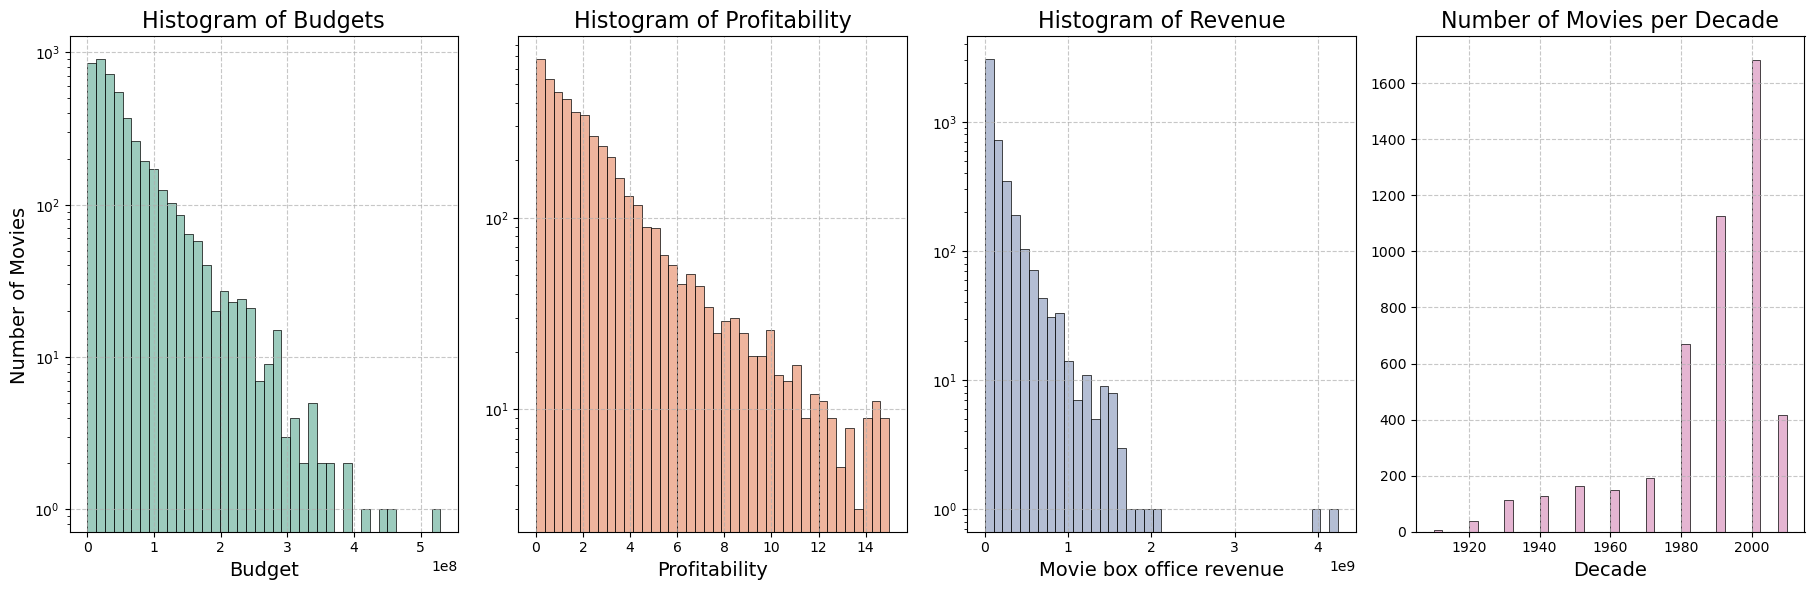

In [42]:
#plot histogram of budgets, profitability, revenue and number of movies per decade

#Create figure
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=False)

#Define info and data of interest for our 4 plots 
variables = ['budget', 'profitability', 'Movie box office revenue', 'decade']
titles = ["Histogram of Budgets", "Histogram of Profitability", "Histogram of Revenue", "Number of Movies per Decade"]
colors = ['#72b6a1', '#e99675', '#95a3c3', '#db96c0']

#Plot all 4 histograms with a loop
for i, (ax, var, title, color) in enumerate(zip(axes, variables, titles, colors)):
    sns.histplot(data=df_filtered, x=var, bins=40, kde=False, color=color, alpha=0.7, ax=ax)
    
    if i < 3:  # Set y-axis to log scale for plots 1, 2 and 3
        ax.set_yscale('log')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(var.capitalize(), fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    
fig.text(0.0, 0.5, 'Number of Movies', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()
plt.savefig('visuals/1_histograms.png', bbox_inches='tight')
plt.show()

#Distribution not normal -> we prefer using the median values rather than mean in the following except when the sample size is too small.

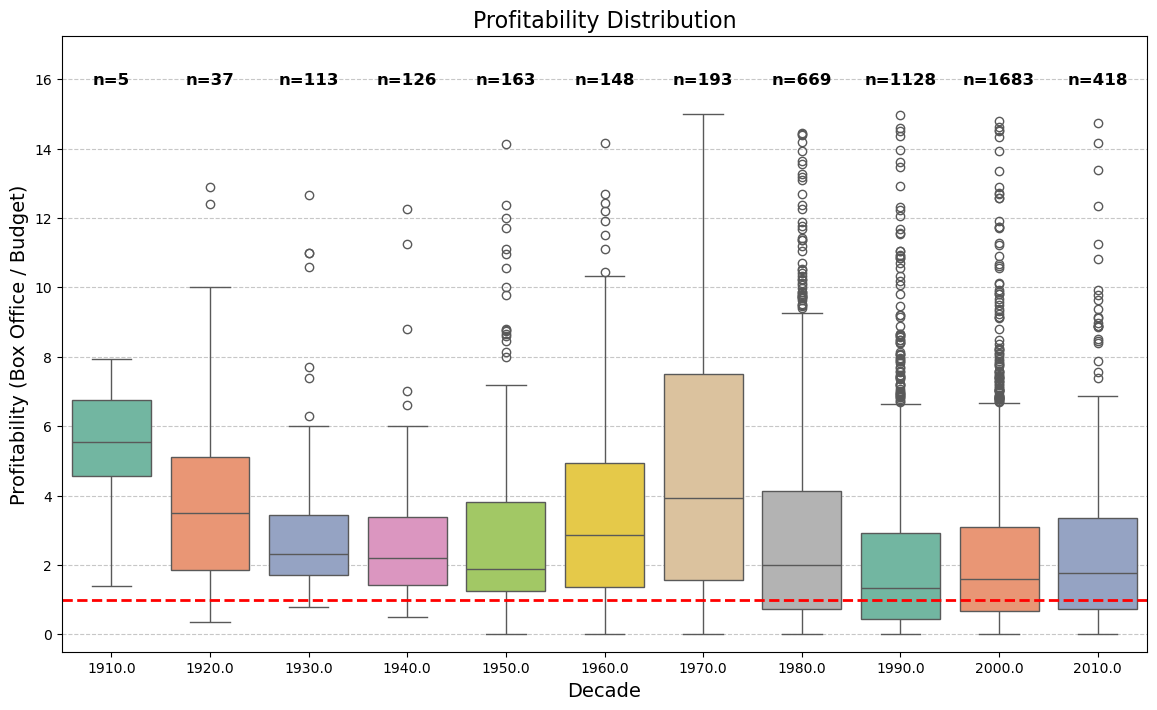

In [17]:
#Boxplot of profitability over time (decade) to see the evolution

#Plot the boxplots
plt.figure(figsize=(14, 8))

sns.boxplot(x="decade",y="profitability",data=df_filtered,legend = False,hue = "decade",palette="Set2")
plt.title("Profitability Over Time", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Add sample count on top
#Positioning of the text
ax = plt.gca()
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min() 
y_range = y_max - y_min

counts = df_filtered['decade'].value_counts().sort_index() #number of movies per decade
for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(i, y_max + 0.05 * y_range, f'n={count}', ha='center', va='bottom',fontsize=12,fontweight='bold')

#Profitability treshhold at y = 1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')

#Fix Y axis range for better visualization
plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
plt.savefig('visuals/2_boxplots.png', bbox_inches='tight')
plt.show()

#Movies less profitable now than in the past, many even don't turn a profit, we will investigate further...

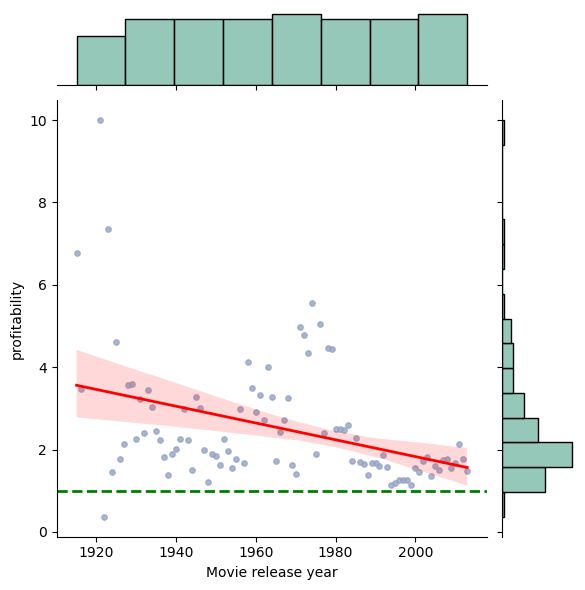

In [18]:
# Confirm the trend with a regression to see if there is a decreasing tendency. 

#Remove the
df_prof = df_filtered[df_filtered['decade'] > 1929] 

#compute the median profitability for each year: 
#Due to the lack of data in the earlier years, as we want each year to weight equally. 
df_prof_grouped = df_prof.groupby('Movie release year')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_prof_grouped['Movie release year'], y=df_prof_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'})

plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)

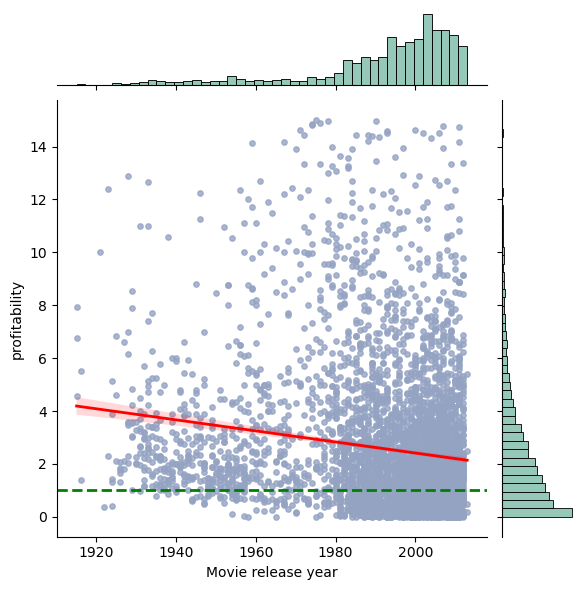

In [19]:
#scatter reg hex kde hist
df_prof = df_filtered[df_filtered['decade'] > 1000]



plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)


In [20]:
#Profitability decreases through the years, as other media might get some marketshare and attention from people. 
# She notices something odd, there seems to be a higher density of points under the green profitability treshhold the more we advance to recent movies. 

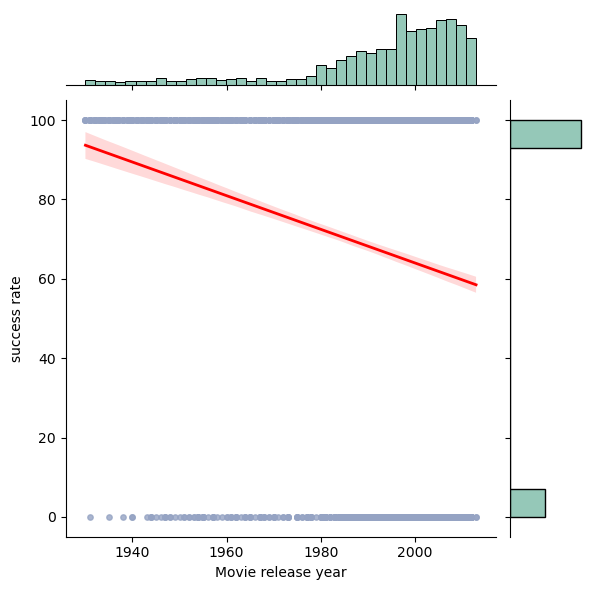

In [21]:
df_filtered['success rate'] = np.where(df_filtered['profitability'] > 1, 100, 0)
df_prof = df_filtered[df_filtered['decade'] > 1920] 



plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['success rate'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

In [22]:
# Suspiscions confirmed, only about 60 to 70% of movies releasing recently turn a profit, while in the past more did. However Annabel ask herself.. recent big budget blockbusters
# may drop the success rate, having their budget significantly higher than others? Annabel want to test a first hypothesis : higher budget movies are a higher risk and are less likely to be profitable. 

## Hypothesis 1 : higher budget movies are a higher risk and are less likely to be profitable. 

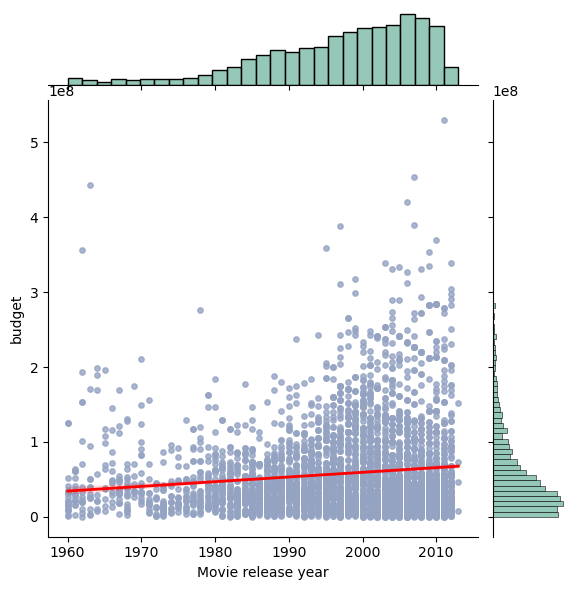

In [24]:
df_prof = df_filtered[df_filtered['decade'] > 1955]


plot = sns.jointplot(x=df_prof['Movie release year'], y=df_prof['budget'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

# Just to confirm her sentiment, movie budgets indeed increased with the years.

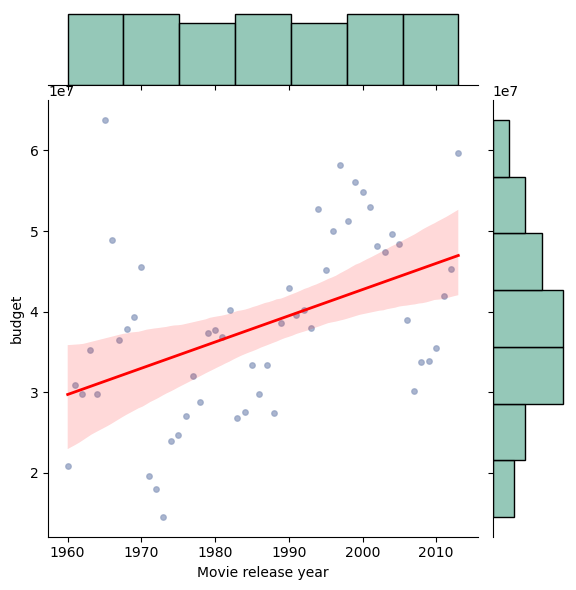

In [25]:
df_prof = df_filtered[df_filtered['decade'] > 1955]

df_prof_grouped = df_prof.groupby('Movie release year')['budget'].median().reset_index()

plot = sns.jointplot(x=df_prof_grouped['Movie release year'], y=df_prof_grouped['budget'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade

# Just to confirm her sentiment, movie budgets indeed increased with the years.

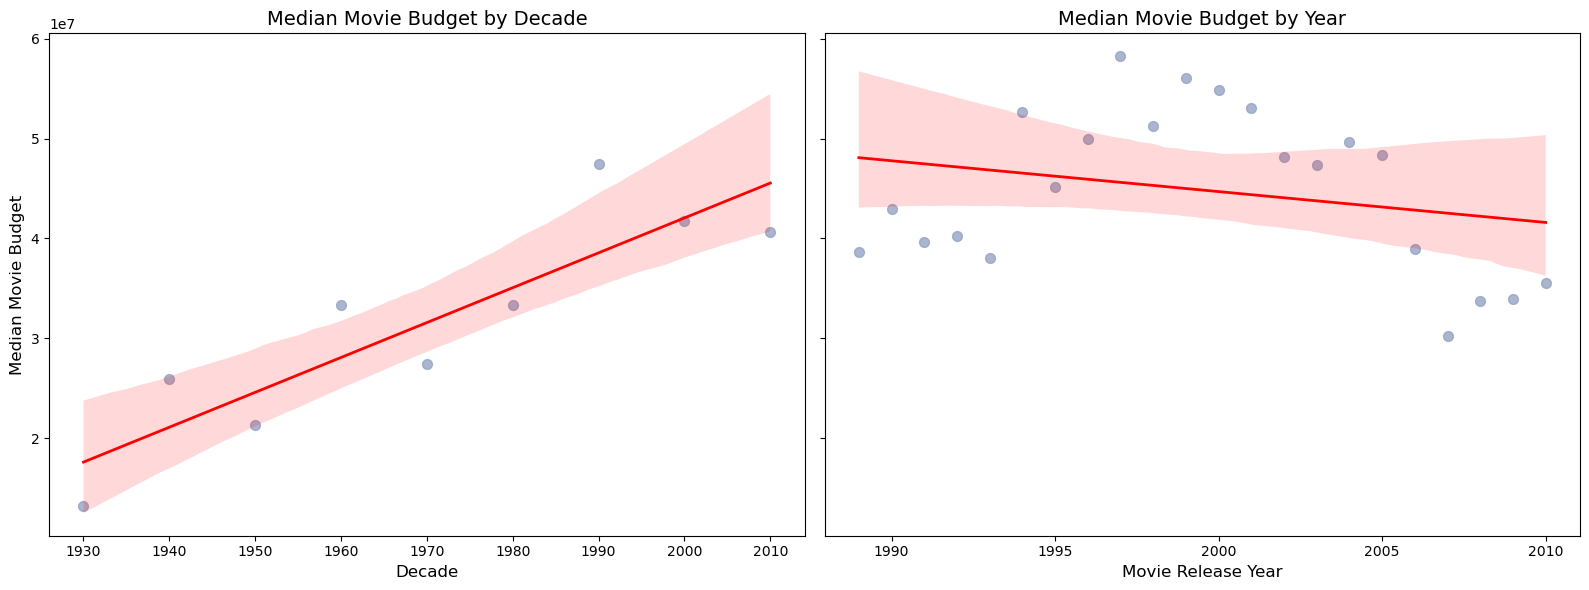

In [26]:
df_budget_decade = df_filtered.dropna(subset=['budget', 'decade'])
df_budget_decade = df_budget_decade[df_budget_decade['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_budget_decade = df_budget_decade[df_budget_decade['budget'] < 300000000]
df_budget_decade = df_budget_decade[df_budget_decade['decade'] > 1920]

# Group by decade and calculate the median runtime
median_budget_per_decade = df_budget_decade.groupby('decade')['budget'].median().reset_index()

# Second dataset: Median runtime by release year
df_budget_year = df_filtered.dropna(subset=['budget', 'Movie release year'])
df_budget_year = df_budget_year[df_budget_year['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_budget_year = df_budget_year[df_budget_year['Movie release year'] > 1988]
df_budget_year = df_budget_year[df_budget_year['Movie release year'] < 2011]

# Group by release year and calculate the median runtime
median_budget_per_year = df_budget_year.groupby('Movie release year')['budget'].median().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Regression on median runtime by decade
sns.regplot(
    x=median_budget_per_decade['decade'], 
    y=median_budget_per_decade['budget'], 
    ax=axes[0],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0].set_title("Median Movie Budget by Decade", fontsize=14)
axes[0].set_xlabel("Decade", fontsize=12)
axes[0].set_ylabel("Median Movie Budget", fontsize=12)

# Plot 2: Regression on median runtime by release year
sns.regplot(
    x=median_budget_per_year['Movie release year'], 
    y=median_budget_per_year['budget'], 
    ax=axes[1],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1].set_title("Median Movie Budget by Year", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

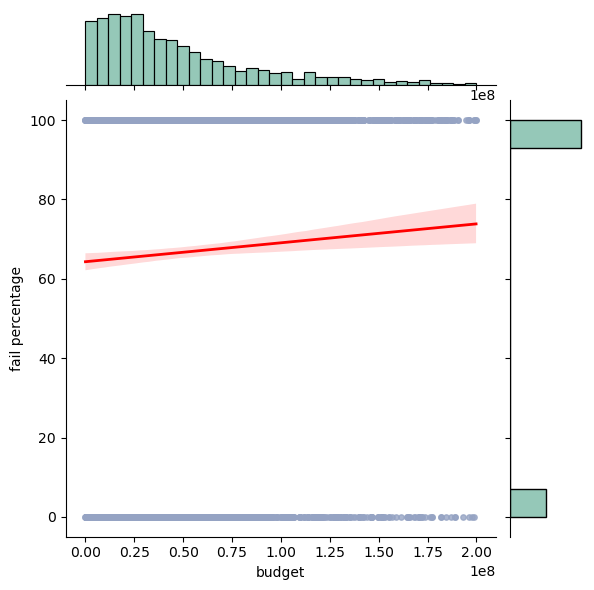

In [27]:
df_filtered['fail percentage'] = np.where(df_filtered['profitability'] > 1, 100, 0)
df_prof = df_filtered[df_filtered['budget'] < 200000000] 


plot = sns.jointplot(x=df_prof['budget'], y=df_prof['fail percentage'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade
plot.fig.suptitle('Median Profitability vs Movie Release Year', fontsize=16)

#To her surprise, lower budget movies seem to have a slightly lower success rate. Intrigued, she wants to find out how a movie budget affects profitability

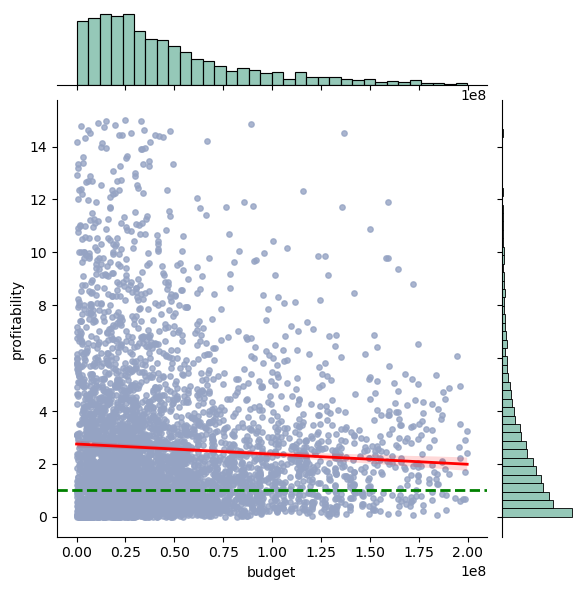

In [28]:
df_prof = df_filtered[df_filtered['budget'] < 200000000]

plot = sns.jointplot(x=df_prof['budget'], y=df_prof['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade
plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)


In [29]:
# Lower budget movies tend to be more profitable than high budget productions. She just realized the mess she put herself into : how to find the sweet spot to maximize 
# profitability while maximizing the chance to turn a profit? Fortunately, there are other factors to account for which might explain the variability in profitabilty.

## Hypothesis 2: Does movie runtime influence revenue?
assuming ticket prices are constant, people might prefer longer movies as they would get more watchtime per dollar spent. 

In [ ]:
#We use the runtime dataset, as not dependent on time
df_run = df_runtime[df_runtime['Movie runtime'] < 800]
df_run = df_run[df_run['decade'] > 1929]
print(df_run.shape)

plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release year",
    y="Movie runtime",
    data=df_run,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 250)
#plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
#plt.xticks(fontsize=6, rotation=45)
plt.xticks([])

plt.show()

#constant runtime through time, except in the 60s. She keeps it in mind to investigate later...

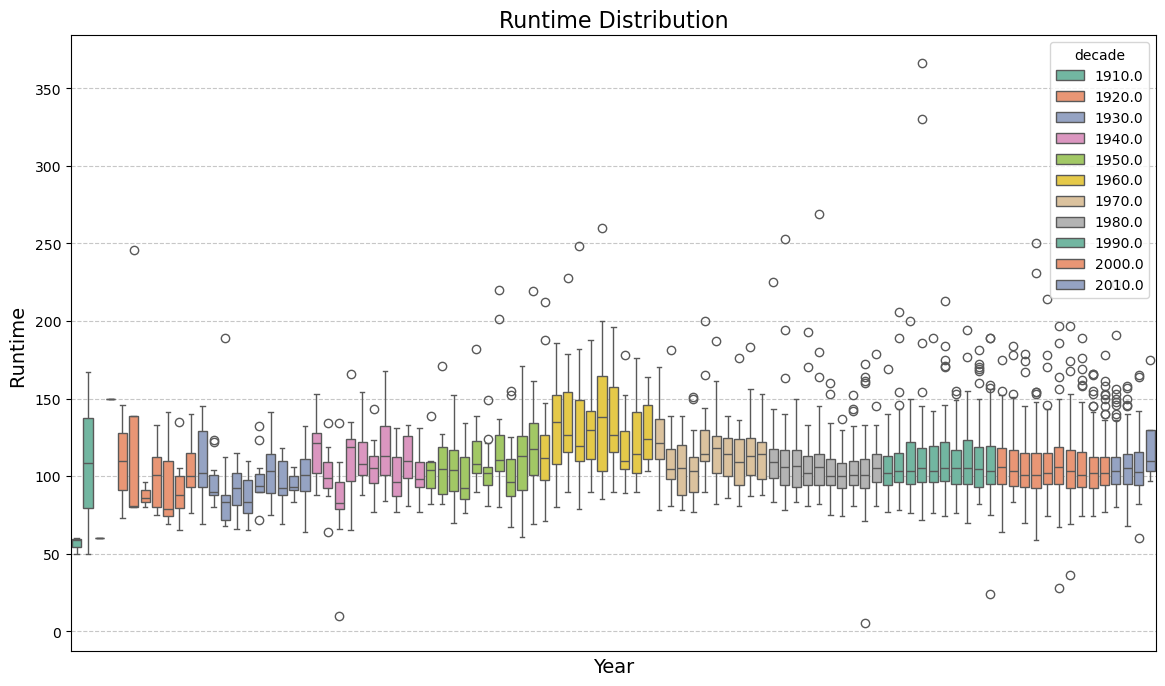

In [31]:
#df_filtered["Movie release year"] = df_filtered["Movie release year"].astype(int)

df_filtered = df_filtered[df_filtered['Movie runtime'] < 800]


plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release year",
    y="Movie runtime",
    data=df_filtered,
    legend = True,
    hue = "decade",
    palette="Set2"
)

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')
#plt.xticks(fontsize=6, rotation=45)
plt.xticks([])

plt.show()

#constant runtime through time, except in the 60s. She keeps it in mind to investigate later...

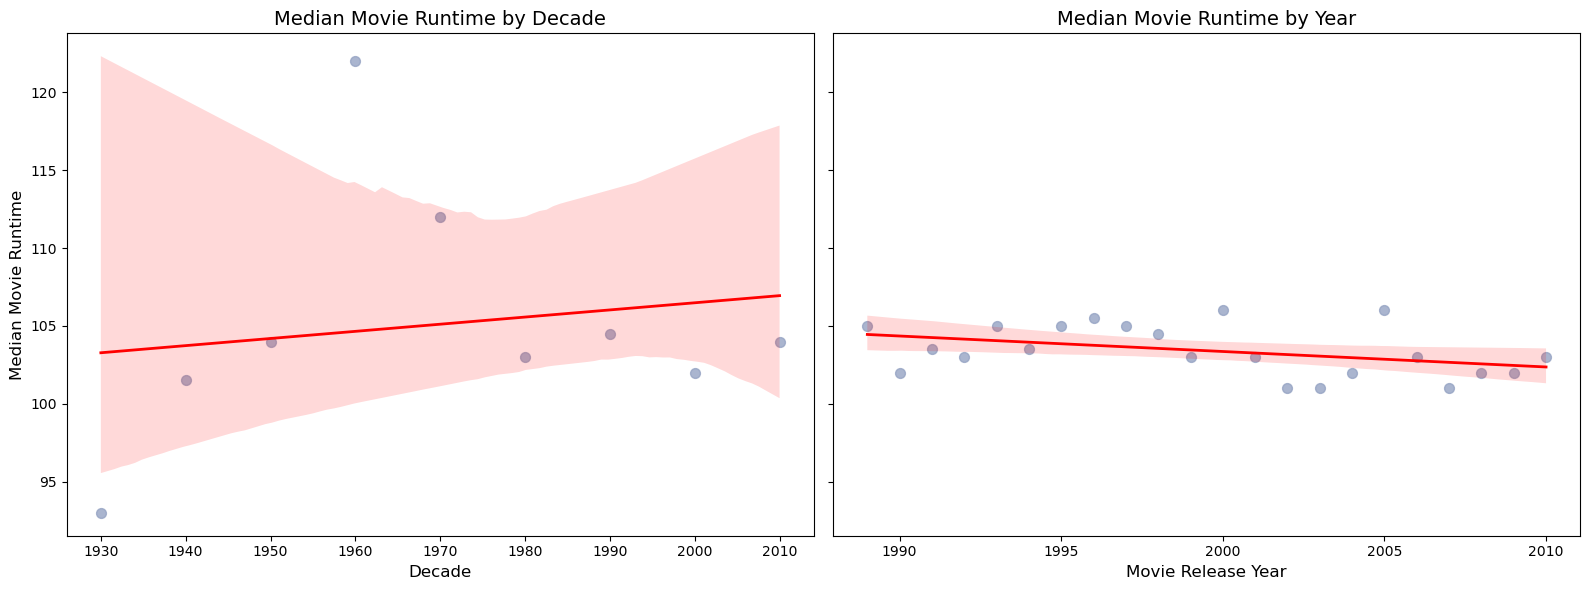

In [32]:
df_runtime_decade = df_filtered.dropna(subset=['Movie runtime', 'decade'])
df_runtime_decade = df_runtime_decade[df_runtime_decade['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_runtime_decade = df_runtime_decade[df_runtime_decade['Movie runtime'] < 300]
df_runtime_decade = df_runtime_decade[df_runtime_decade['decade'] > 1920]

# Group by decade and calculate the median runtime
median_runtime_per_decade = df_runtime_decade.groupby('decade')['Movie runtime'].median().reset_index()

# Second dataset: Median runtime by release year
df_runtime_year = df_filtered.dropna(subset=['Movie runtime', 'Movie release year'])
df_runtime_year = df_runtime_year[df_runtime_year['Movie countries'].apply(lambda x: 'United States of America' in x)]
df_runtime_year = df_runtime_year[df_runtime_year['Movie release year'] > 1988]
df_runtime_year = df_runtime_year[df_runtime_year['Movie release year'] < 2011]

# Group by release year and calculate the median runtime
median_runtime_per_year = df_runtime_year.groupby('Movie release year')['Movie runtime'].median().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Regression on median runtime by decade
sns.regplot(
    x=median_runtime_per_decade['decade'], 
    y=median_runtime_per_decade['Movie runtime'], 
    ax=axes[0],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0].set_title("Median Movie Runtime by Decade", fontsize=14)
axes[0].set_xlabel("Decade", fontsize=12)
axes[0].set_ylabel("Median Movie Runtime", fontsize=12)

# Plot 2: Regression on median runtime by release year
sns.regplot(
    x=median_runtime_per_year['Movie release year'], 
    y=median_runtime_per_year['Movie runtime'], 
    ax=axes[1],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1].set_title("Median Movie Runtime by Year", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
# There is no substantial change in runtime through the years hovering around the 100 minutes for every genre, except for family movies that became as long as other movies through time.


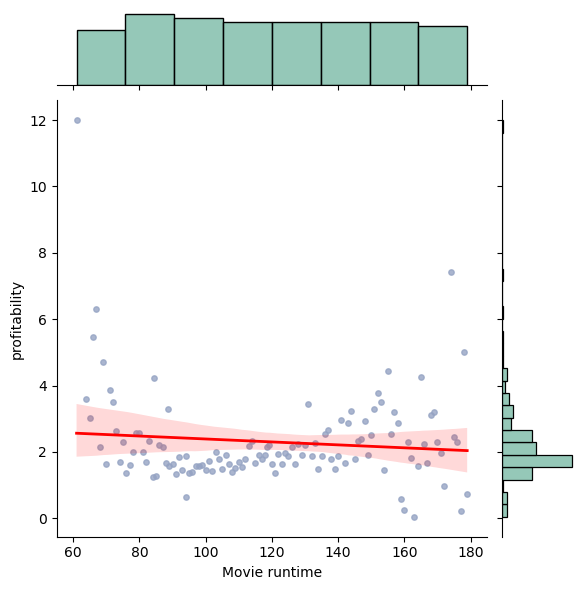

In [34]:
df_run = df_filtered[df_filtered['Movie runtime'] < 170]
df_run = df_run[df_run['Movie runtime'] > 70]

df_run = df_filtered[(df_filtered['Movie runtime'] < 180) & (df_filtered['Movie runtime'] > 60)]

# Group by runtime and calculate the median profitability
df_run_grouped = df_run.groupby('Movie runtime')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_run_grouped['Movie runtime'], y=df_run_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade


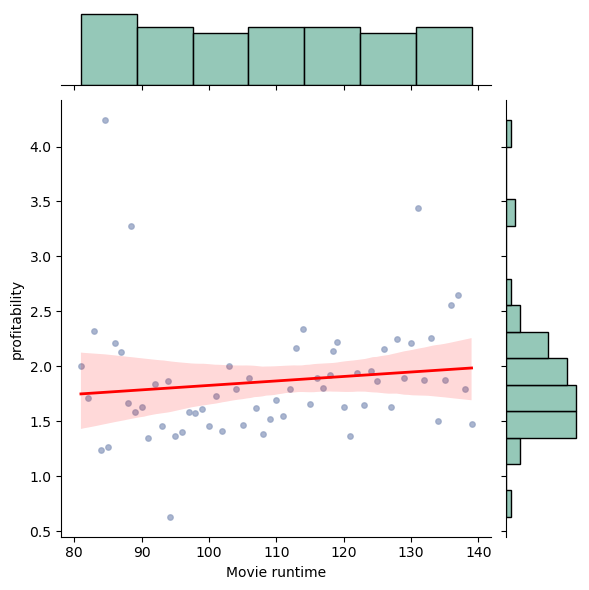

In [35]:
df_run = df_filtered[df_filtered['Movie runtime'] < 140]
df_run = df_run[df_run['Movie runtime'] > 80]


# Group by runtime and calculate the median profitability
df_run_grouped = df_run.groupby('Movie runtime')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_run_grouped['Movie runtime'], y=df_run_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade


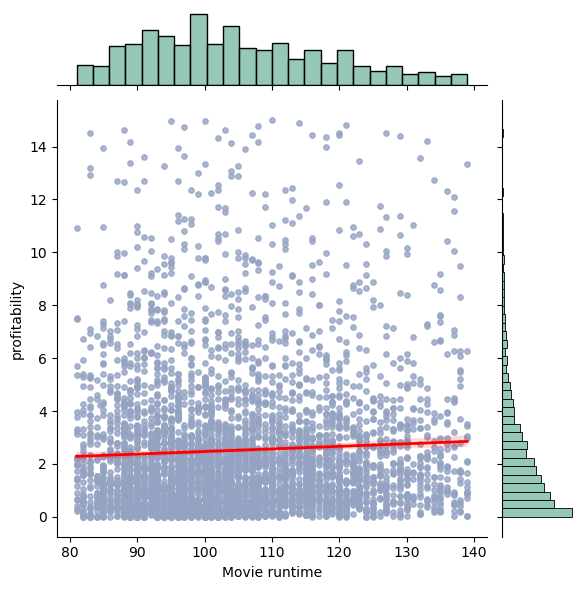

In [36]:
df_run = df_filtered[df_filtered['Movie runtime'] < 140]
df_run = df_run[df_run['Movie runtime'] > 80]

plot = sns.jointplot(x=df_run['Movie runtime'], y=df_run['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'}) #ou decade
#plot.ax_joint.set_ylim(0, 3)
#plot.ax_joint.set_yscale('log')


In [37]:
#fairly constant, it does not seem to have an effect. Maybe a slight increase for longer movies. Next, Annabel wants to look into the movie release schedule, when are the most profitable movies releasing?

## Hypothesis 3: what is the most profitable release period?
First, Annebel investigates if within a month there are changes in release days, under the assumptions that people wait for their salary before going to the cinema, so there would be more watchers at the start of each month. 

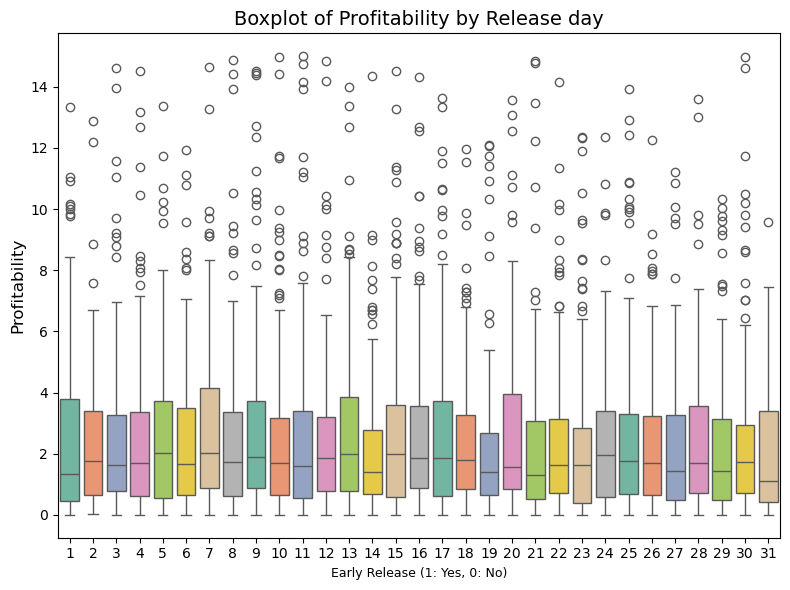

In [40]:
df_filtered['Movie release day'] = df_filtered['Movie release day'].astype(int)

df_prof = df_filtered[df_filtered['decade'] > 1950]

#df_prof = df_filtered[df_filtered['Movie genres'].apply(lambda x: 'Family Film' in x)]

# Create a boxplot of profitability by early or late release
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_prof['Movie release day'], 
    y=df_prof['profitability'], 
    hue = df_prof['Movie release day'],
    #palette=['#95a3c3'],
    palette='Set2',
    legend = None
)

# Customize plot appearance
plt.xlabel("Early Release (1: Yes, 0: No)", fontsize=9)
plt.ylabel("Profitability", fontsize=12)
plt.title("Boxplot of Profitability by Release day", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [41]:
#she observes no tendency or visible dependence :-( moving onto if some release months are more profitable 

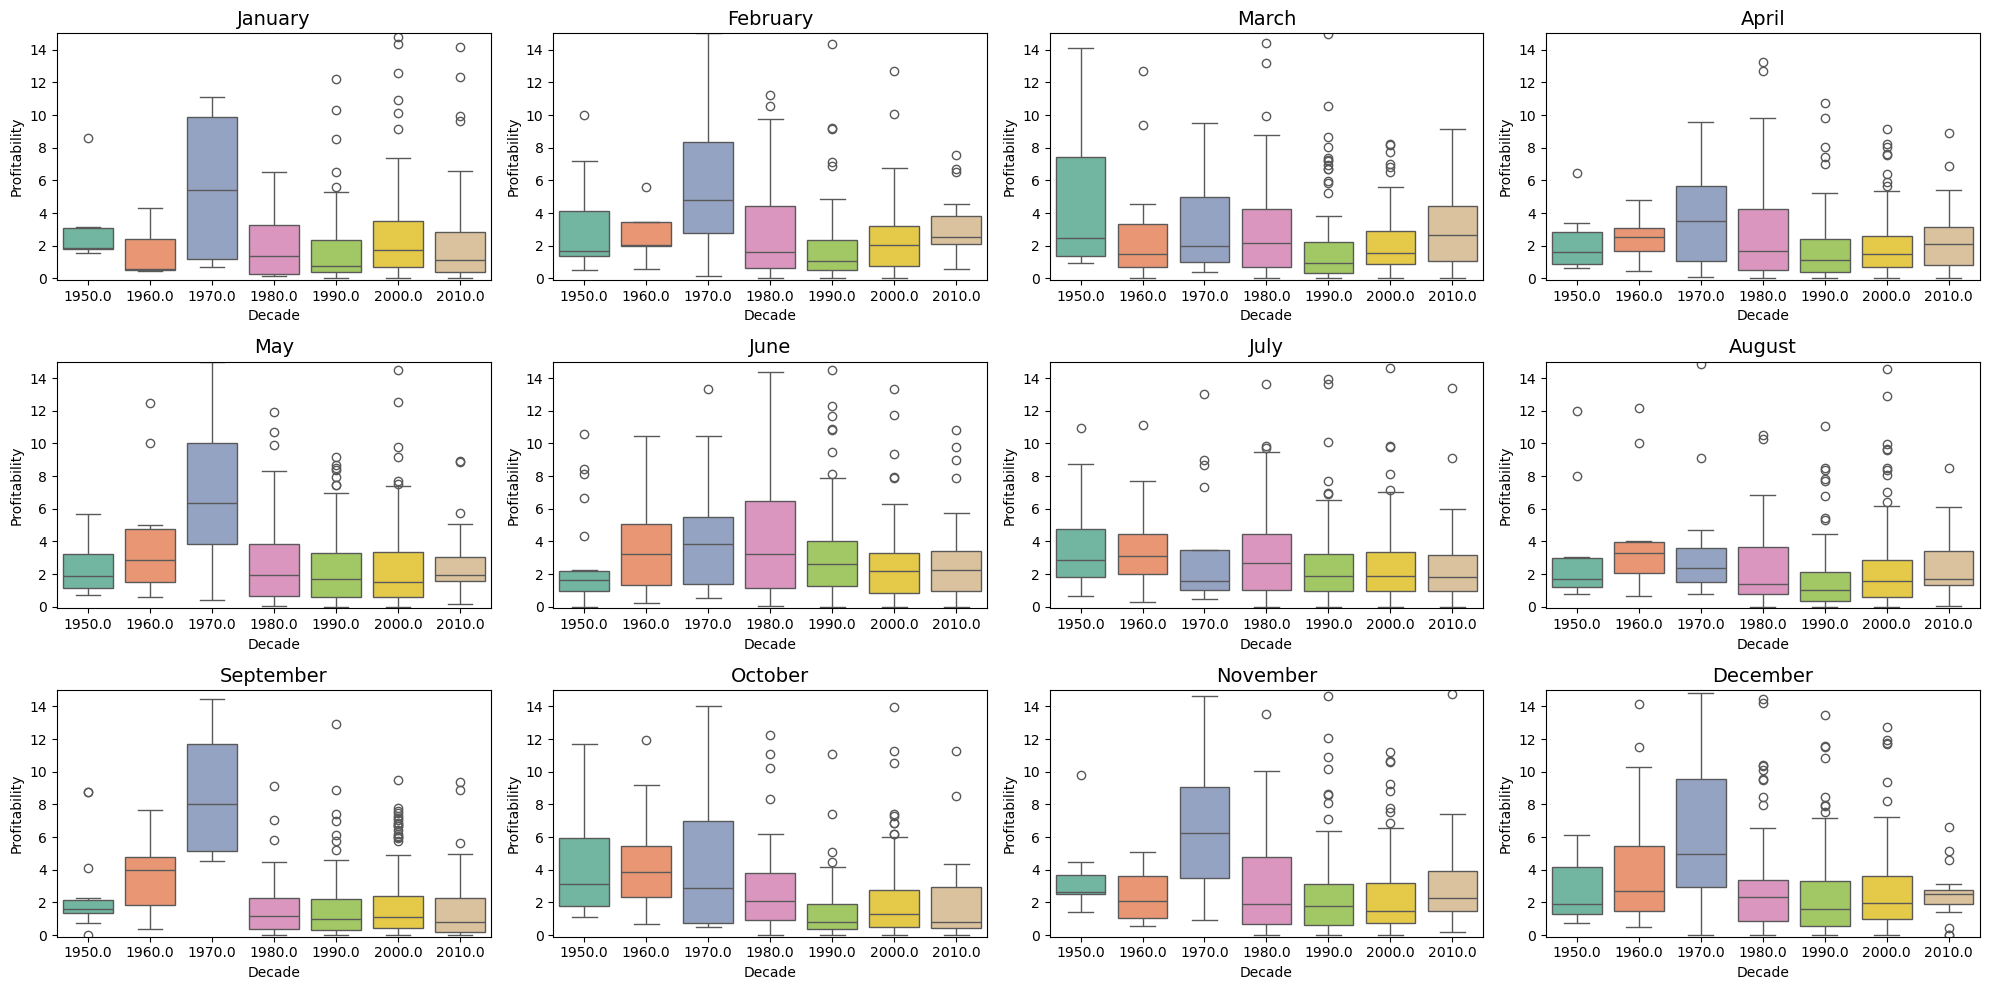

In [42]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

n_rows, n_cols = 3, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

data_df = df_filtered[df_filtered['decade'] > 1940]
for i in range(12):
    ax = axes[i]
    
    # Filter the data for the current month
    month_data = data_df[data_df['Movie release month'] == i + 1]  # Assuming months are numbered 1-12 in the data
    
    # Create a boxplot
    sns.boxplot(
        x='decade',  # Replace with relevant x-axis variable if needed
        y='profitability',
        data=month_data,
        ax=ax,
        hue = "decade",
        palette='Set2',
        legend = None
        
    )
    
    ax.set_title(f"{months[i]}", fontsize=14)
    ax.set_xlabel('Decade')  # Adjust the label if necessary
    ax.set_ylabel('Profitability')
    ax.set_ylim(-0.1, 15)
# Remove empty subplots if data does not fill all grid cells
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

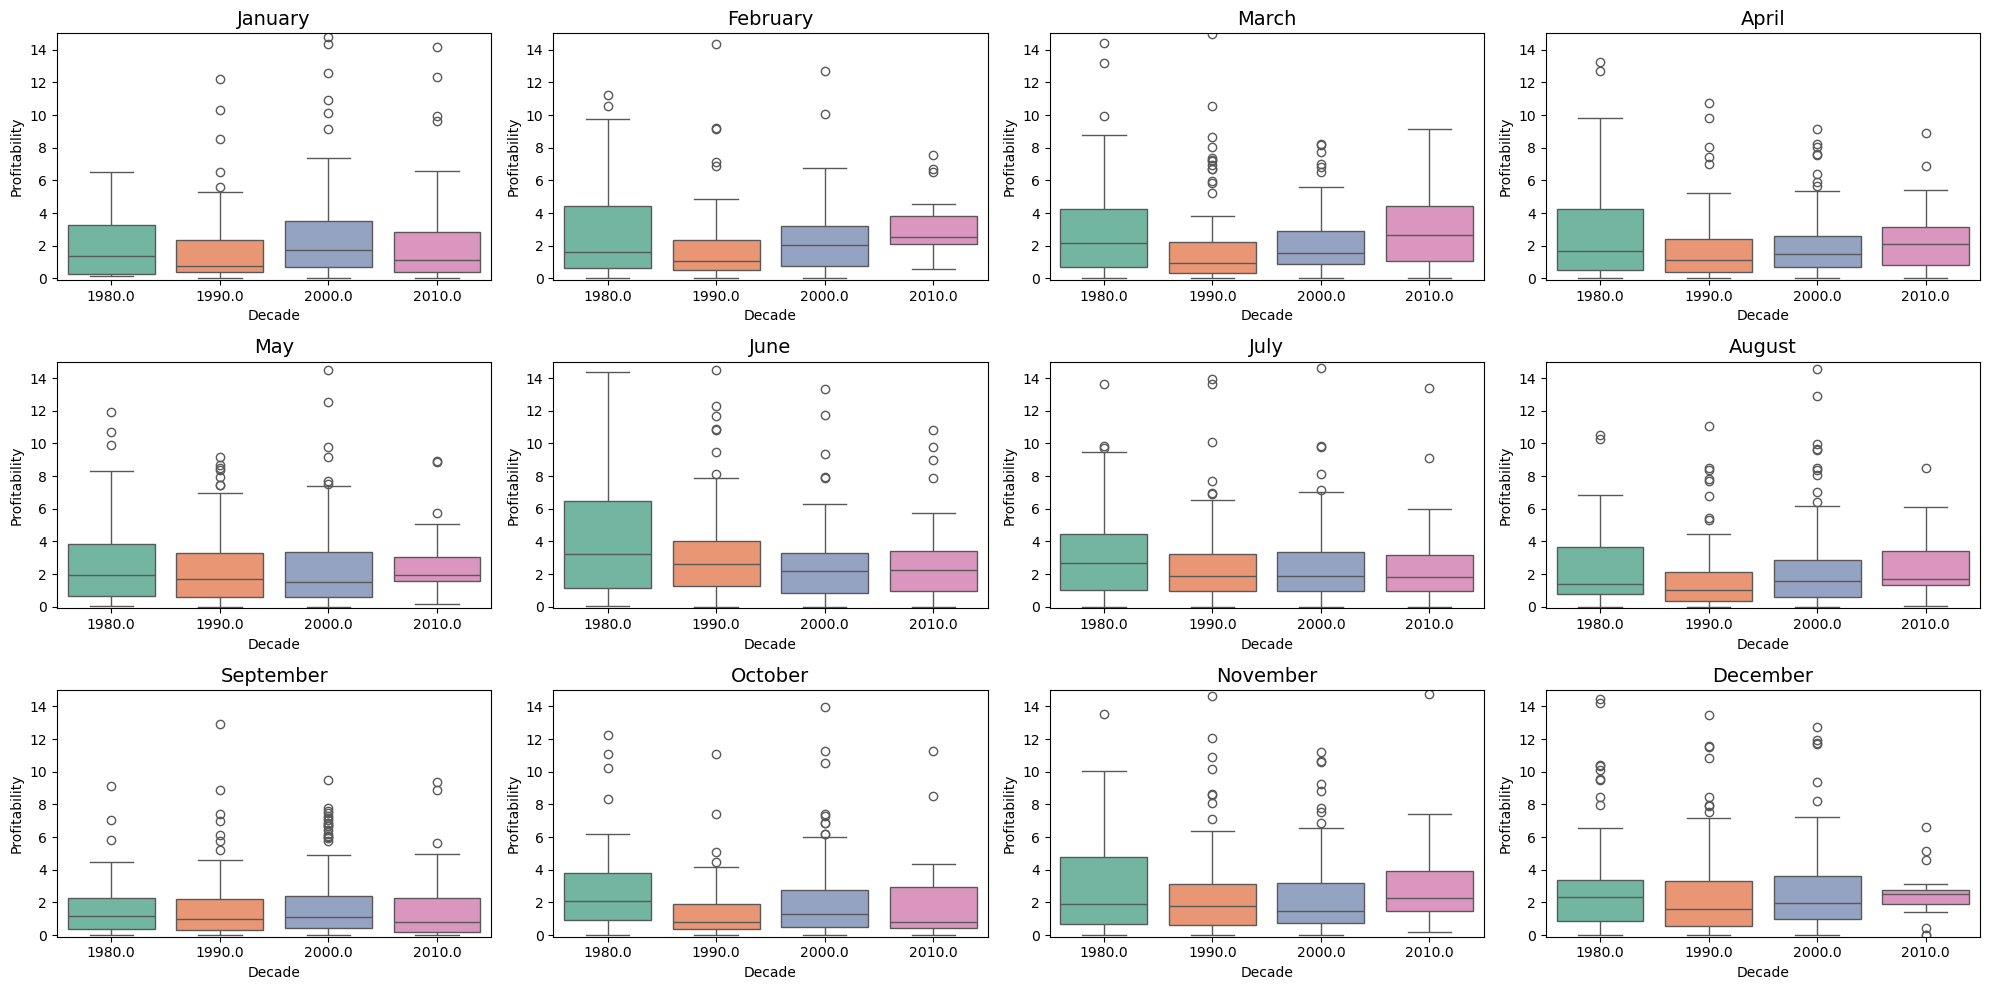

In [43]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

n_rows, n_cols = 3, 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

data_df = df_filtered[df_filtered['decade'] > 1970]
for i in range(12):
    ax = axes[i]
    
    # Filter the data for the current month
    month_data = data_df[data_df['Movie release month'] == i + 1]  # Assuming months are numbered 1-12 in the data
    
    # Create a boxplot
    sns.boxplot(
        x='decade',  # Replace with relevant x-axis variable if needed
        y='profitability',
        data=month_data,
        ax=ax,
        hue = "decade",
        palette='Set2',
        legend = None
        
    )
    
    ax.set_title(f"{months[i]}", fontsize=14)
    ax.set_xlabel('Decade')  # Adjust the label if necessary
    ax.set_ylabel('Profitability')
    ax.set_ylim(-0.1, 15)
# Remove empty subplots if data does not fill all grid cells
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

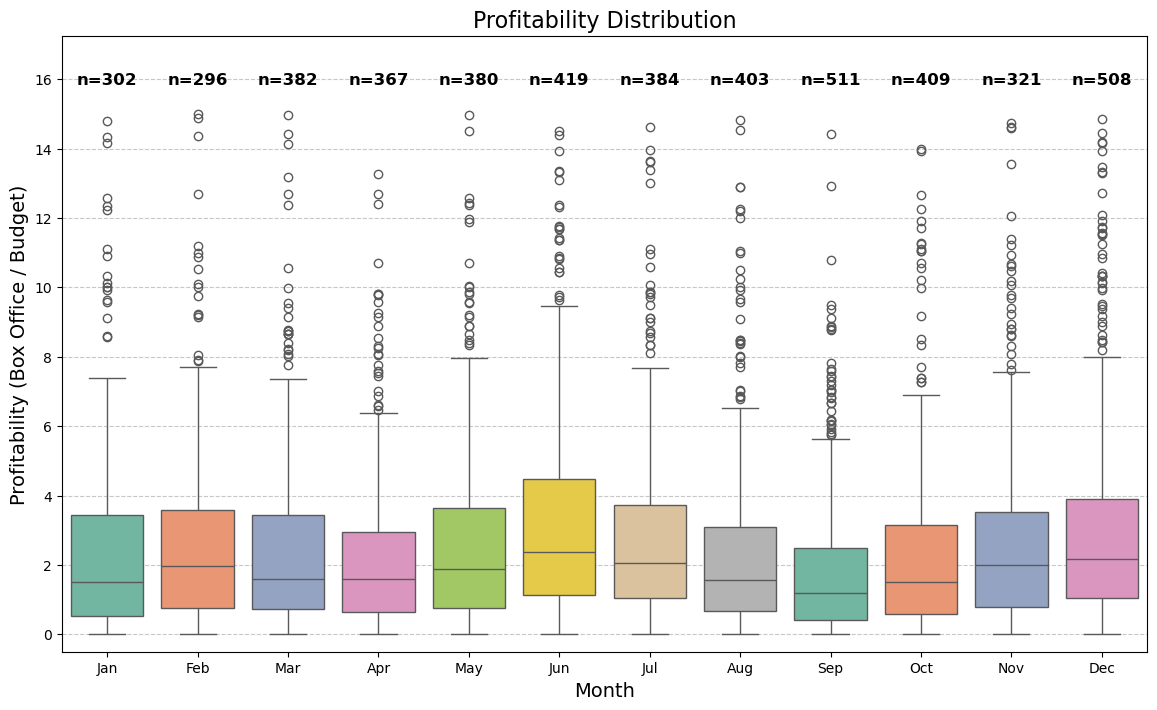

In [44]:
counts = df_filtered['Movie release month'].value_counts().sort_index()

# Step 2: Create the boxplot
plt.figure(figsize=(14, 8))

sns.boxplot(
    x="Movie release month",
    y="profitability",
    data=df_filtered,
    legend = False,
    hue = "Movie release month",
    palette="Set2"
)

plt.title("Profitability Distribution", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()  # Get current axes
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(
        i, 
        y_max + 0.05 * y_range,  
        f'n={count}', 
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.show()

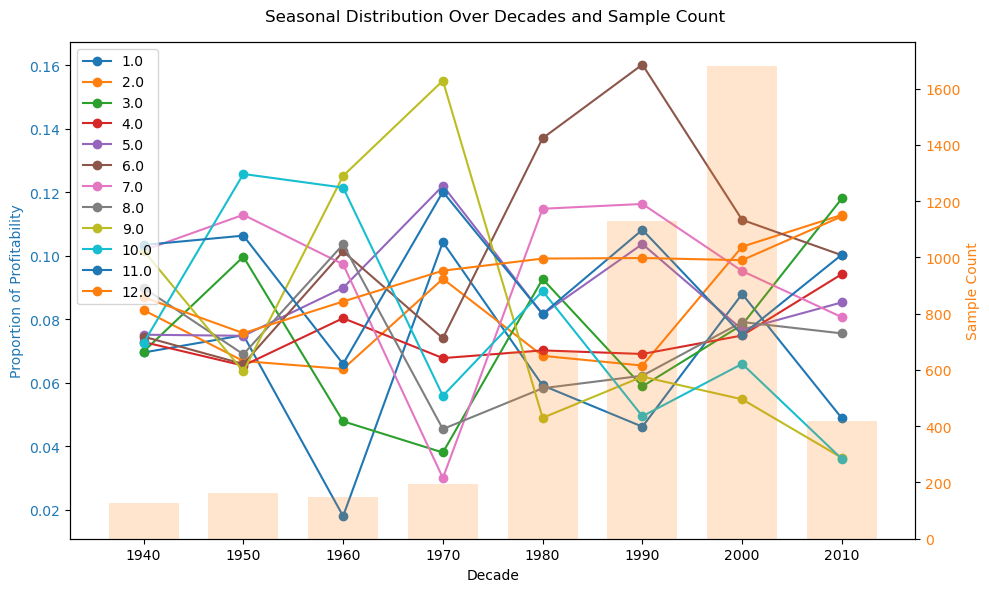

In [45]:
df_data = df_filtered[df_filtered['decade']>1930]


heatmap_data = df_data.pivot_table(
    index="decade", 
    columns="Movie release month", 
    values="profitability", 
    aggfunc="median"
).fillna(0)  # Replace NaN with 0 for display

# Normalize profitability per decade (row-wise normalization)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)





counts = df_data['decade'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Revenue
ax1.set_xlabel("Decade")
ax1.set_ylabel("Proportion of Profitability", color="tab:blue")
for season in np.linspace(1,12,12):
    ax1.plot(heatmap_data_normalized.index, heatmap_data_normalized[season], label=season, marker='o')
#ax1.tick_params(axis='x', heatmap_data_normalized.index, rotation=45)
ax1.grid(False)
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.legend()

# Plot Sample Count on a secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(counts.index, counts, color="tab:orange", alpha=0.2, label="Sample Count",width=7)
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Add a title and layout adjustments
fig.suptitle("Seasonal Distribution Over Decades and Sample Count")
fig.tight_layout()
plt.show()

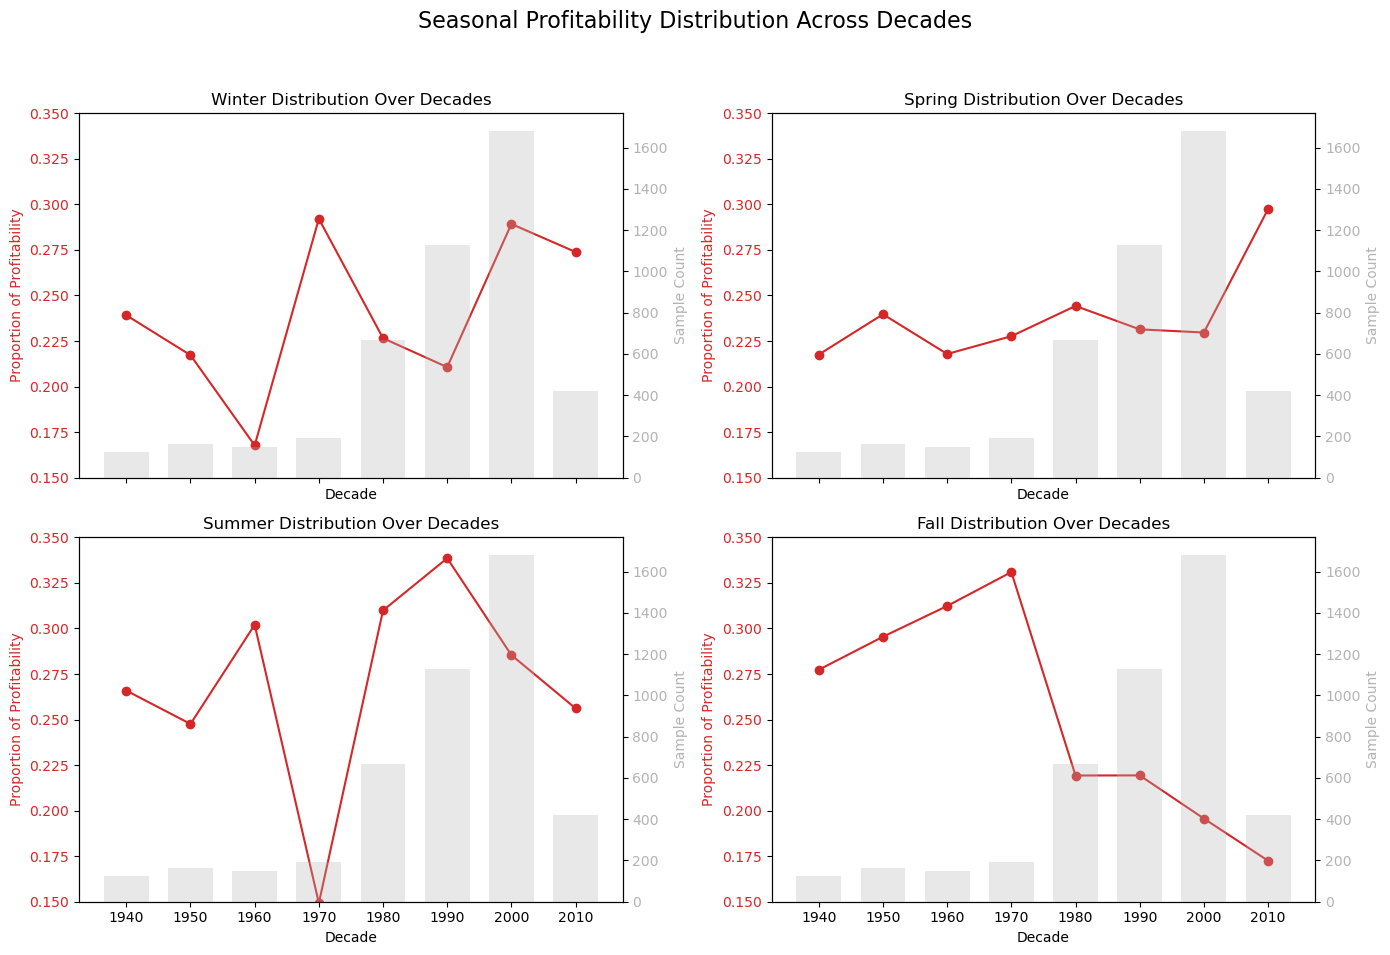

In [46]:
# Define seasons and corresponding months


seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax1 = axes[i]
    # Aggregate data for the specific season
    season_data = heatmap_data_normalized[months].sum(axis=1)
    
    # Plot the proportion of profitability for the season
    ax1.plot(
        heatmap_data_normalized.index,
        season_data,
        label=f"{season_name} (Profitability)",
        marker="o",
        color="tab:red"
    )
    ax1.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax1.set_xlabel("Decade")
    ax1.set_ylabel("Proportion of Profitability", color="tab:red")
    ax1.tick_params(axis="y", labelcolor="tab:red")
    ax1.set_ylim(0.15, 0.35)
    # Plot sample counts on a secondary axis
    ax2 = ax1.twinx()
    ax2.bar(
        counts.index,
        counts,
        color="#b3b3b3",
        alpha=0.3,
        width=7,
        label="Sample Count"
    )
    ax2.set_ylabel("Sample Count", color="#b3b3b3")
    ax2.tick_params(axis="y", labelcolor="#b3b3b3")

# Adjust layout and add a title
fig.suptitle("Seasonal Profitability Distribution Across Decades", fontsize=16)
#fig.supxlabel("Decade", fontsize=14)
#fig.supylabel("Proportion of Profitability", fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

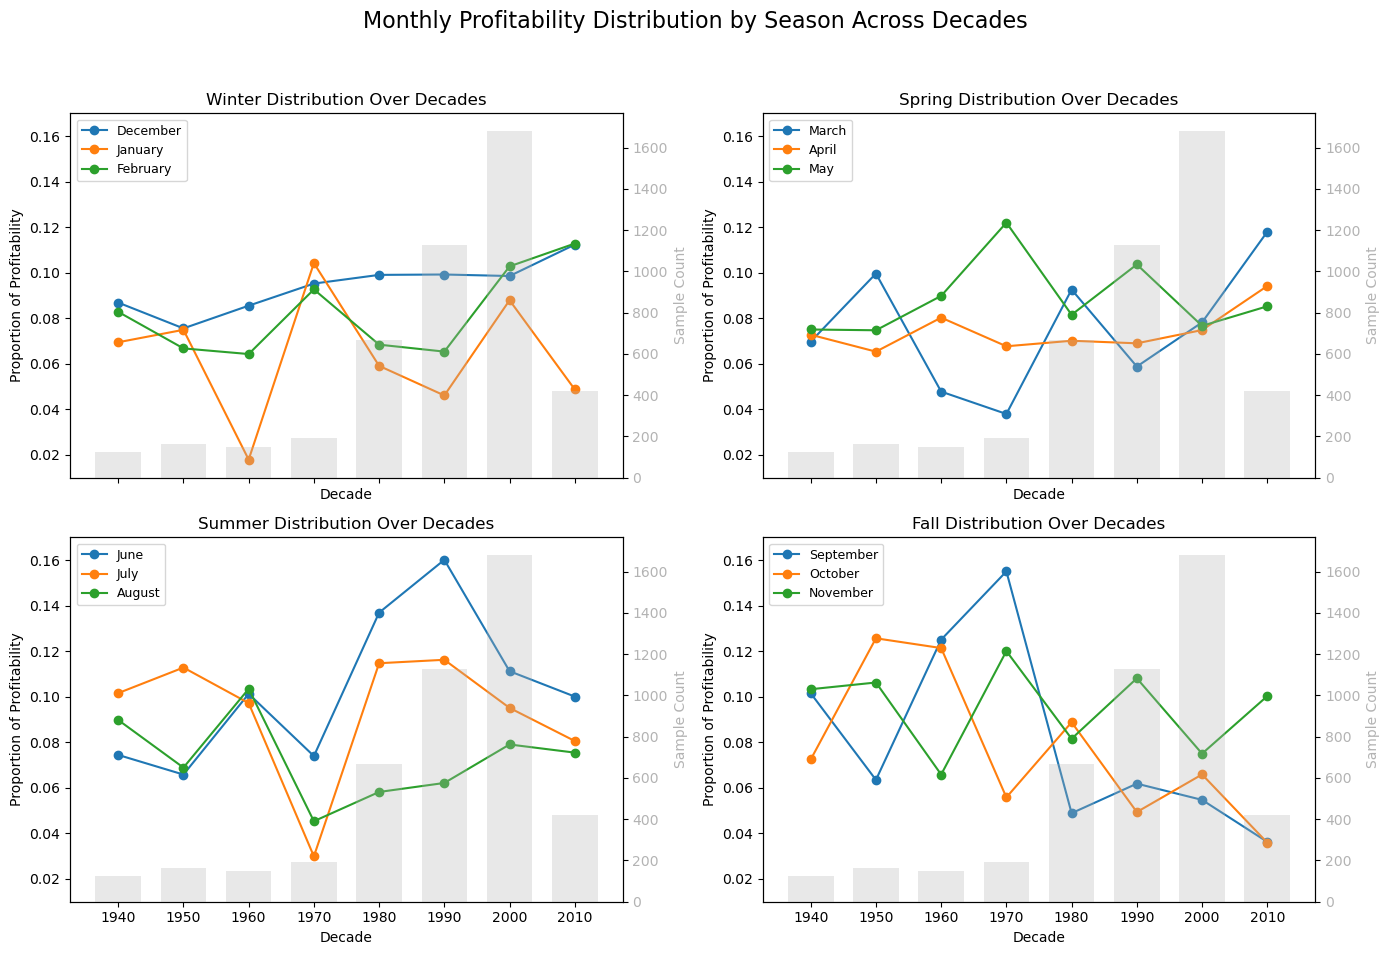

In [47]:
seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}

month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May",
    6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
    11: "November", 12: "December"
}

# Create subplots for each season
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax1 = axes[i]
    # Plot each month's line within the season with renamed labels
    for month in months:
        ax1.plot(
            heatmap_data_normalized.index,
            heatmap_data_normalized[month],
            label=month_names[month],
            marker="o"
        )
    
    # Add season-specific title and labels
    ax1.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax1.set_xlabel("Decade")
    ax1.set_ylabel("Proportion of Profitability")
    ax1.legend(loc="upper left", fontsize=9)
    ax1.set_ylim(0.01, 0.17)
    
    # Secondary axis for sample count
    ax2 = ax1.twinx()
    ax2.bar(
        counts.index,
        counts,
        color="#b3b3b3",
        alpha=0.3,
        width=7,
        label="Sample Count"
    )
    ax2.set_ylabel("Sample Count", color="#b3b3b3")
    ax2.tick_params(axis="y", labelcolor="#b3b3b3")

# Adjust layout and add a title for the entire figure
fig.suptitle("Monthly Profitability Distribution by Season Across Decades", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [48]:
#we can observe peaks in profitability in june and december, regardless of the year. Draw conclusion on more specific months. We will dive deeper into potential reasons for the shifting values later,
# Now Annabel is wondering, how does genre influence profitability? surely some genres are more popular profitable than others, as they have a larger public ...

## Hypothesis 4: Some genres or themes are more popular and might draw more spectators


In [50]:
#First annabel ask herself, how did the genres evolve through time? Surely the current most popular genres did not match the ones of 100 years ago. 

In [51]:
df_exploded.shape

(26037, 19)

In [52]:
df_genres = df_exploded.groupby(['decade', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)


df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)


#df_genres = df_genres.loc[df_genres['percentage'] >= 3]

df_genres

decade      Movie genres  count  total  percentage
0    1910.0             Drama      3     19   15.789474
1    1910.0             Indie      5     19   26.315789
2    1920.0            Action      3    195    1.538462
3    1920.0  Action/Adventure      2    195    1.025641
4    1920.0         Adventure      6    195    3.076923
..      ...               ...    ...    ...         ...
96   2010.0             Drama    208   1791   11.613624
97   2010.0       Family Film     48   1791    2.680067
98   2010.0             Indie     30   1791    1.675042
99   2010.0      Romance Film     87   1791    4.857621
100  2010.0          Thriller    144   1791    8.040201

[101 rows x 5 columns]

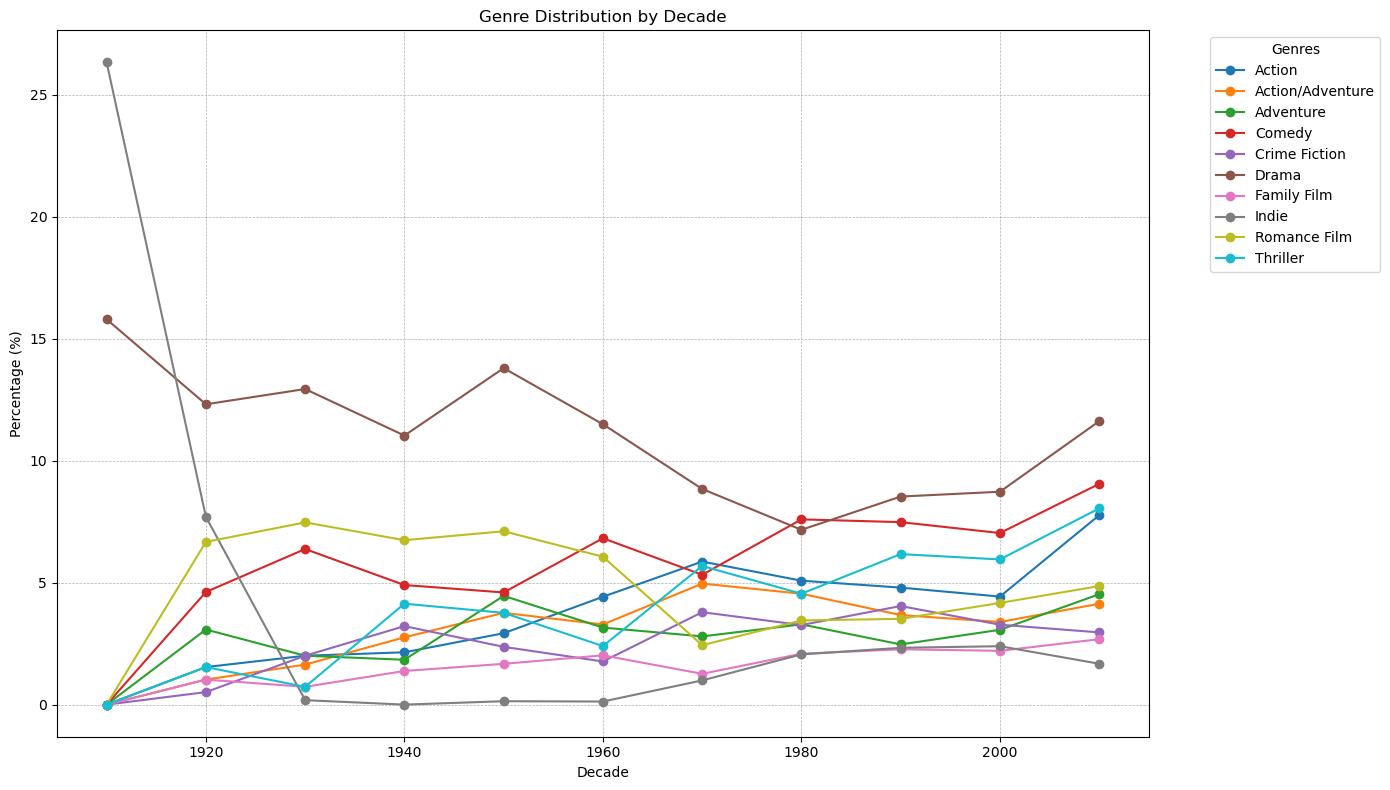

In [53]:
pivot_table = df_genres.pivot(index='decade', columns='Movie genres', values='percentage').fillna(0)

# Add an "Other" category if it doesn't already exist
#if 'Other' not in pivot_table.columns:
#    pivot_table['Other'] = 100 - pivot_table.sum(axis=1)

# Plot the stacked bar chart
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Genre Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Percentage (%)")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#changer pour 10 most popular genres

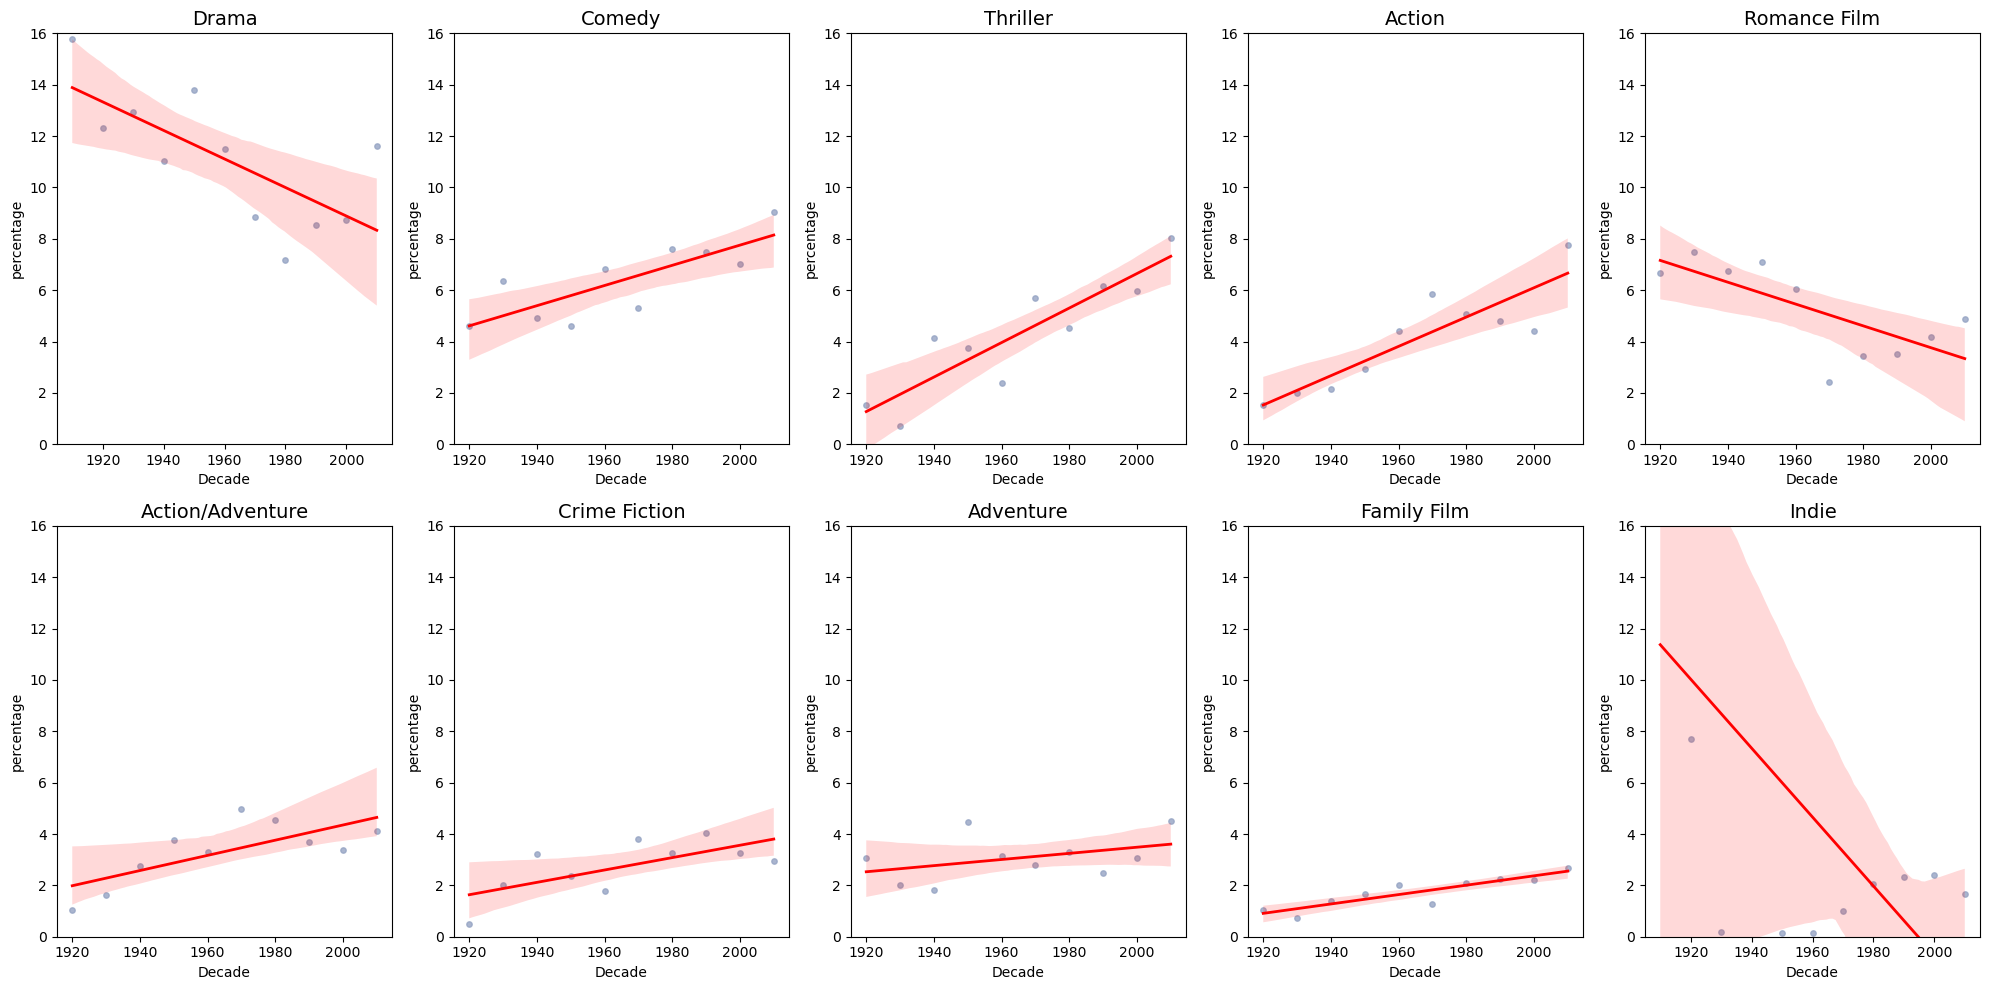

In [54]:
df_genres = df_exploded.groupby(['decade', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)


df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='decade',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Decade')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

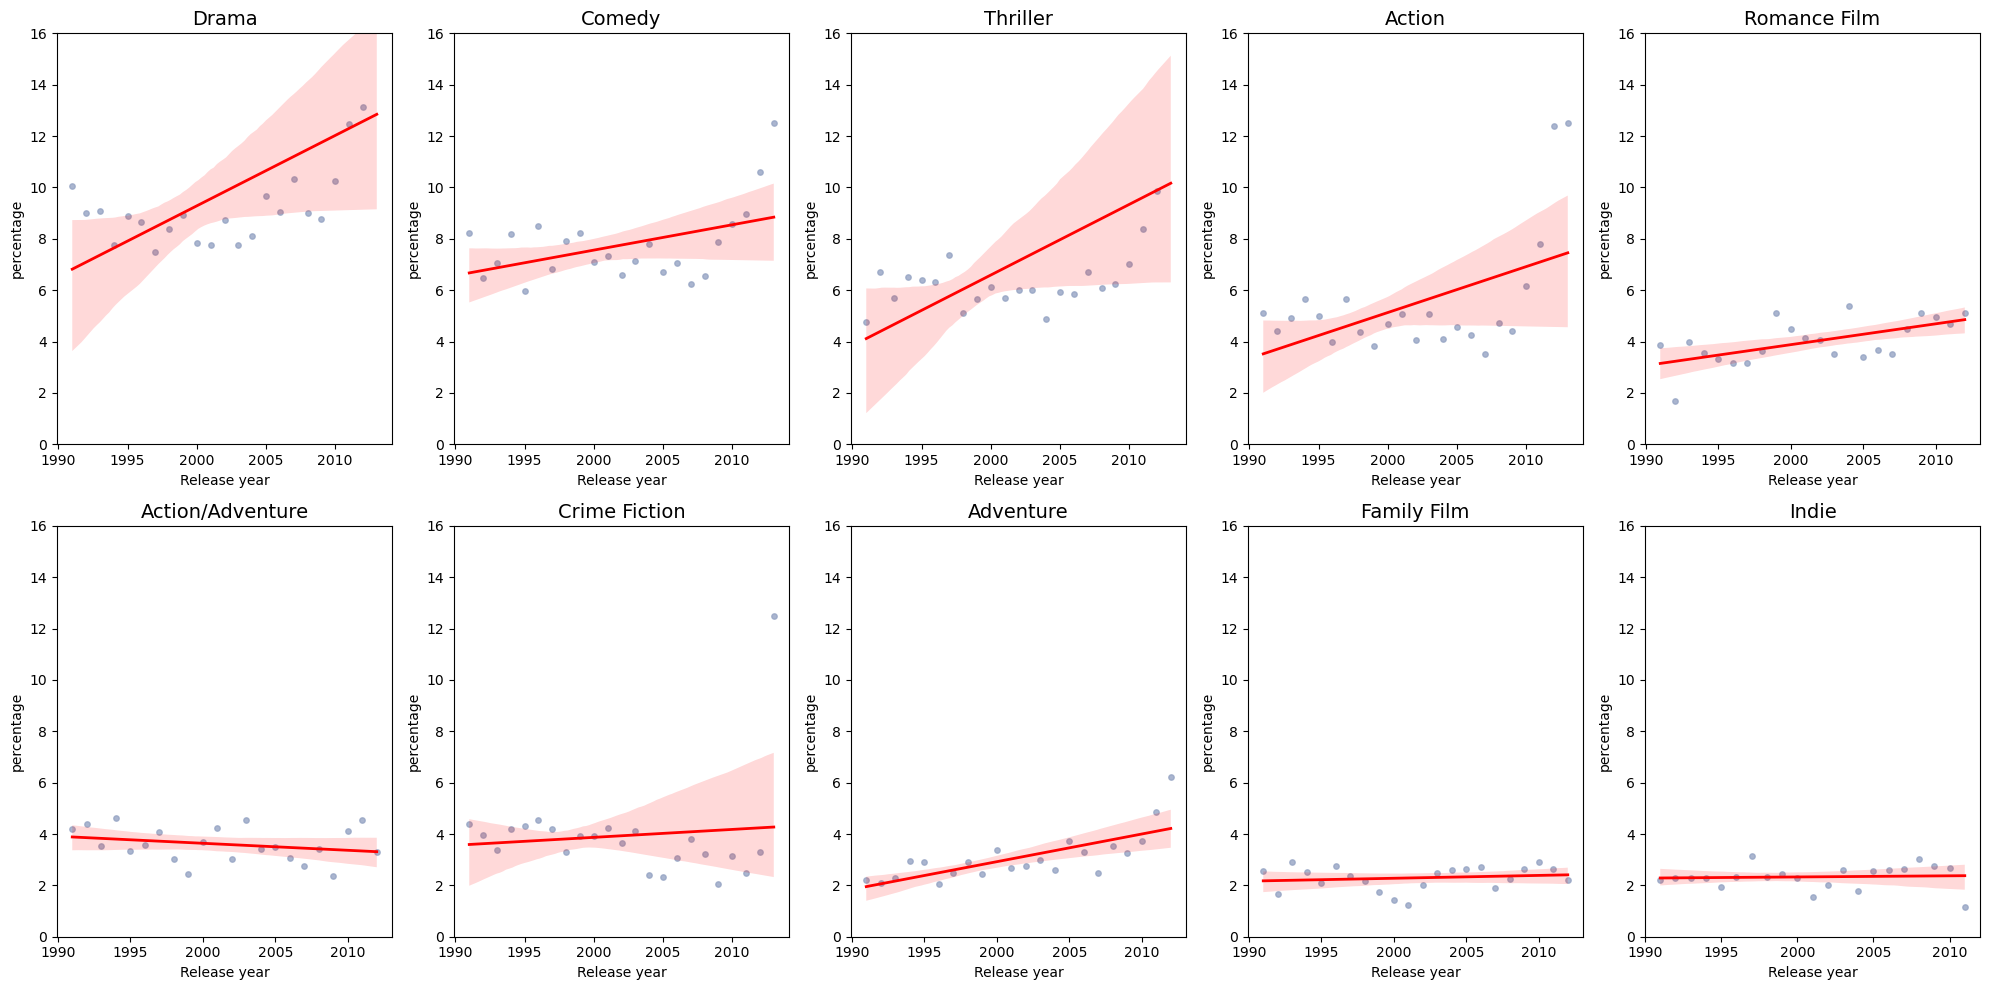

In [55]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['Movie release year', 'Movie genres', 'count']
df_genres['total'] = df_genres.groupby('Movie release year')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Movie genres'] = df_genres['Movie genres'].astype(str)

df_genres = df_genres[df_genres['Movie release year'] > 1990]
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Release year')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

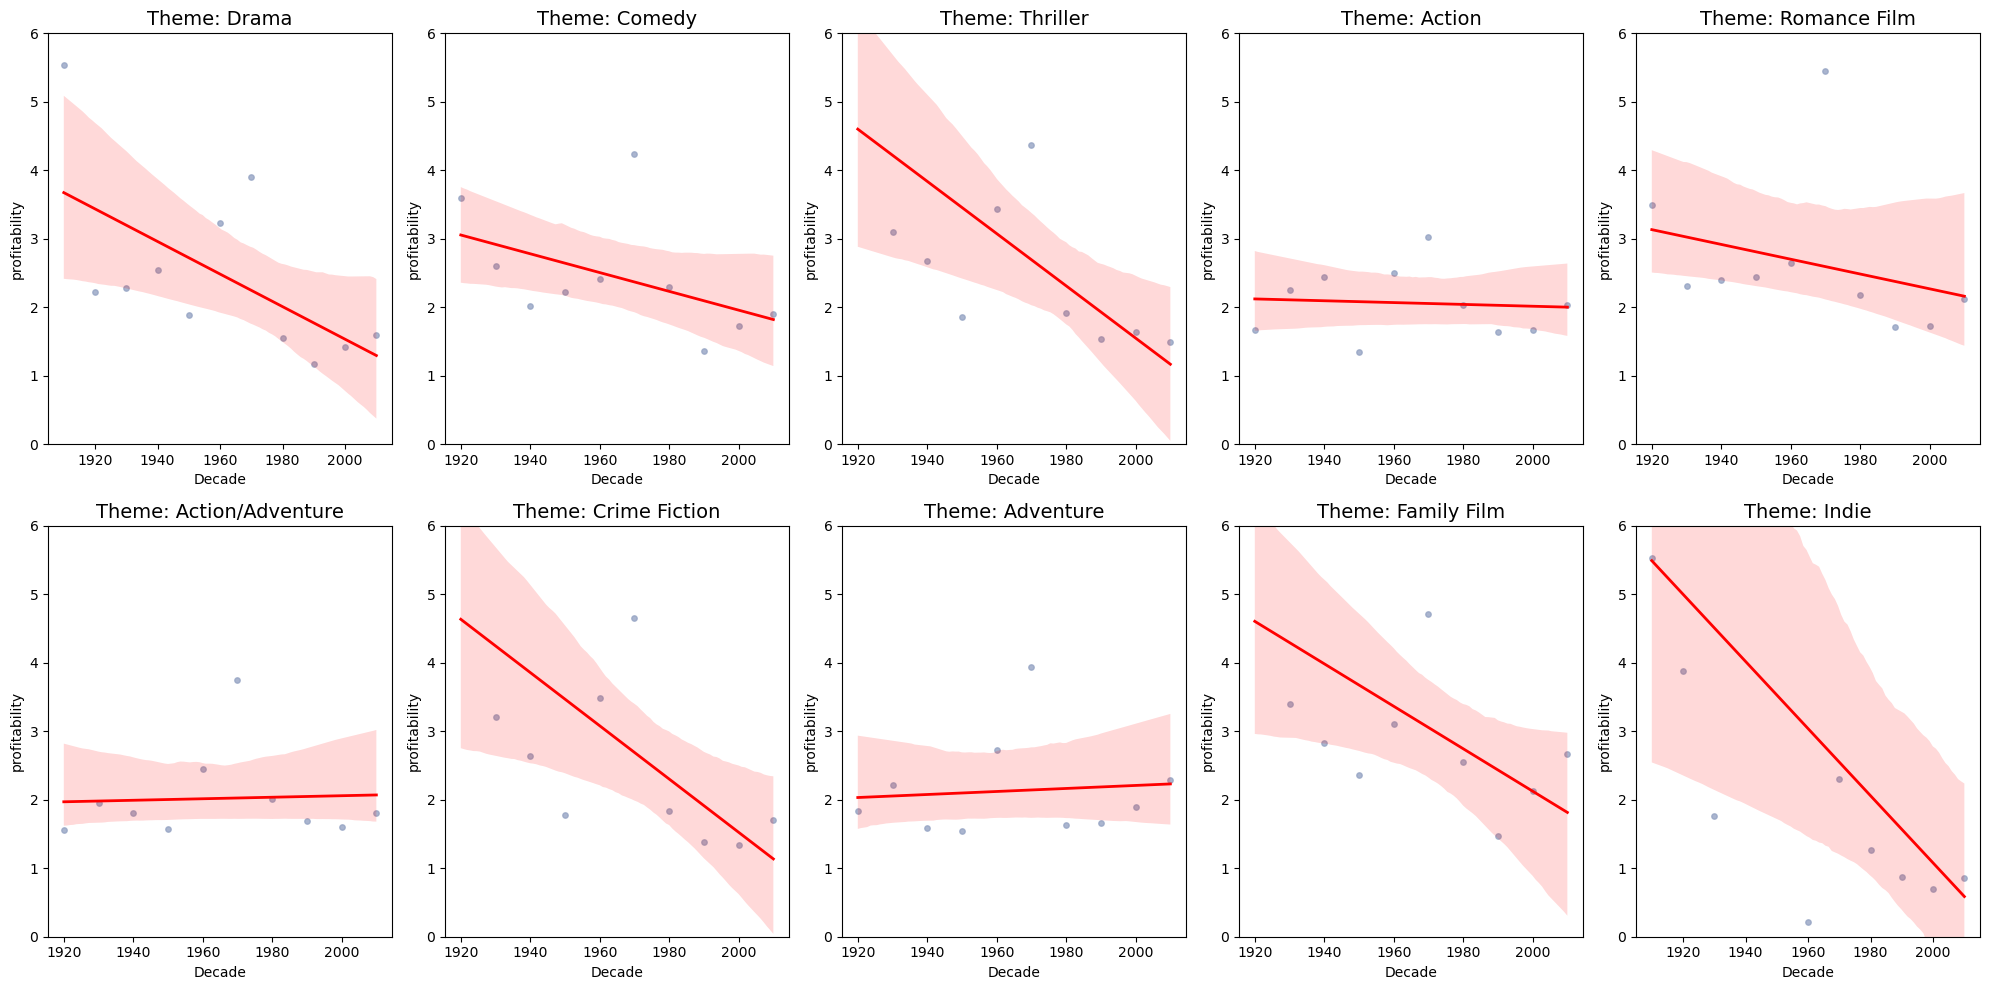

In [56]:
df_genres = df_exploded.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
#df_genres = df_genres[df_genres['Movie release year'] > 1995]
df_genres = df_genres[df_genres['decade'] > 1900]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='decade',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Decade')
    ax.set_ylabel('profitability')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


#WE DONT HAVE ENOUGH DATA IN THE EARLIER YEARS to have meaningful year-averages, so we take decade averages. Action and adventure movies seem to have constant profitability while other decreases
# Lets refine the regression over the last 2 decades where we have enough data to use the yearly medians. 

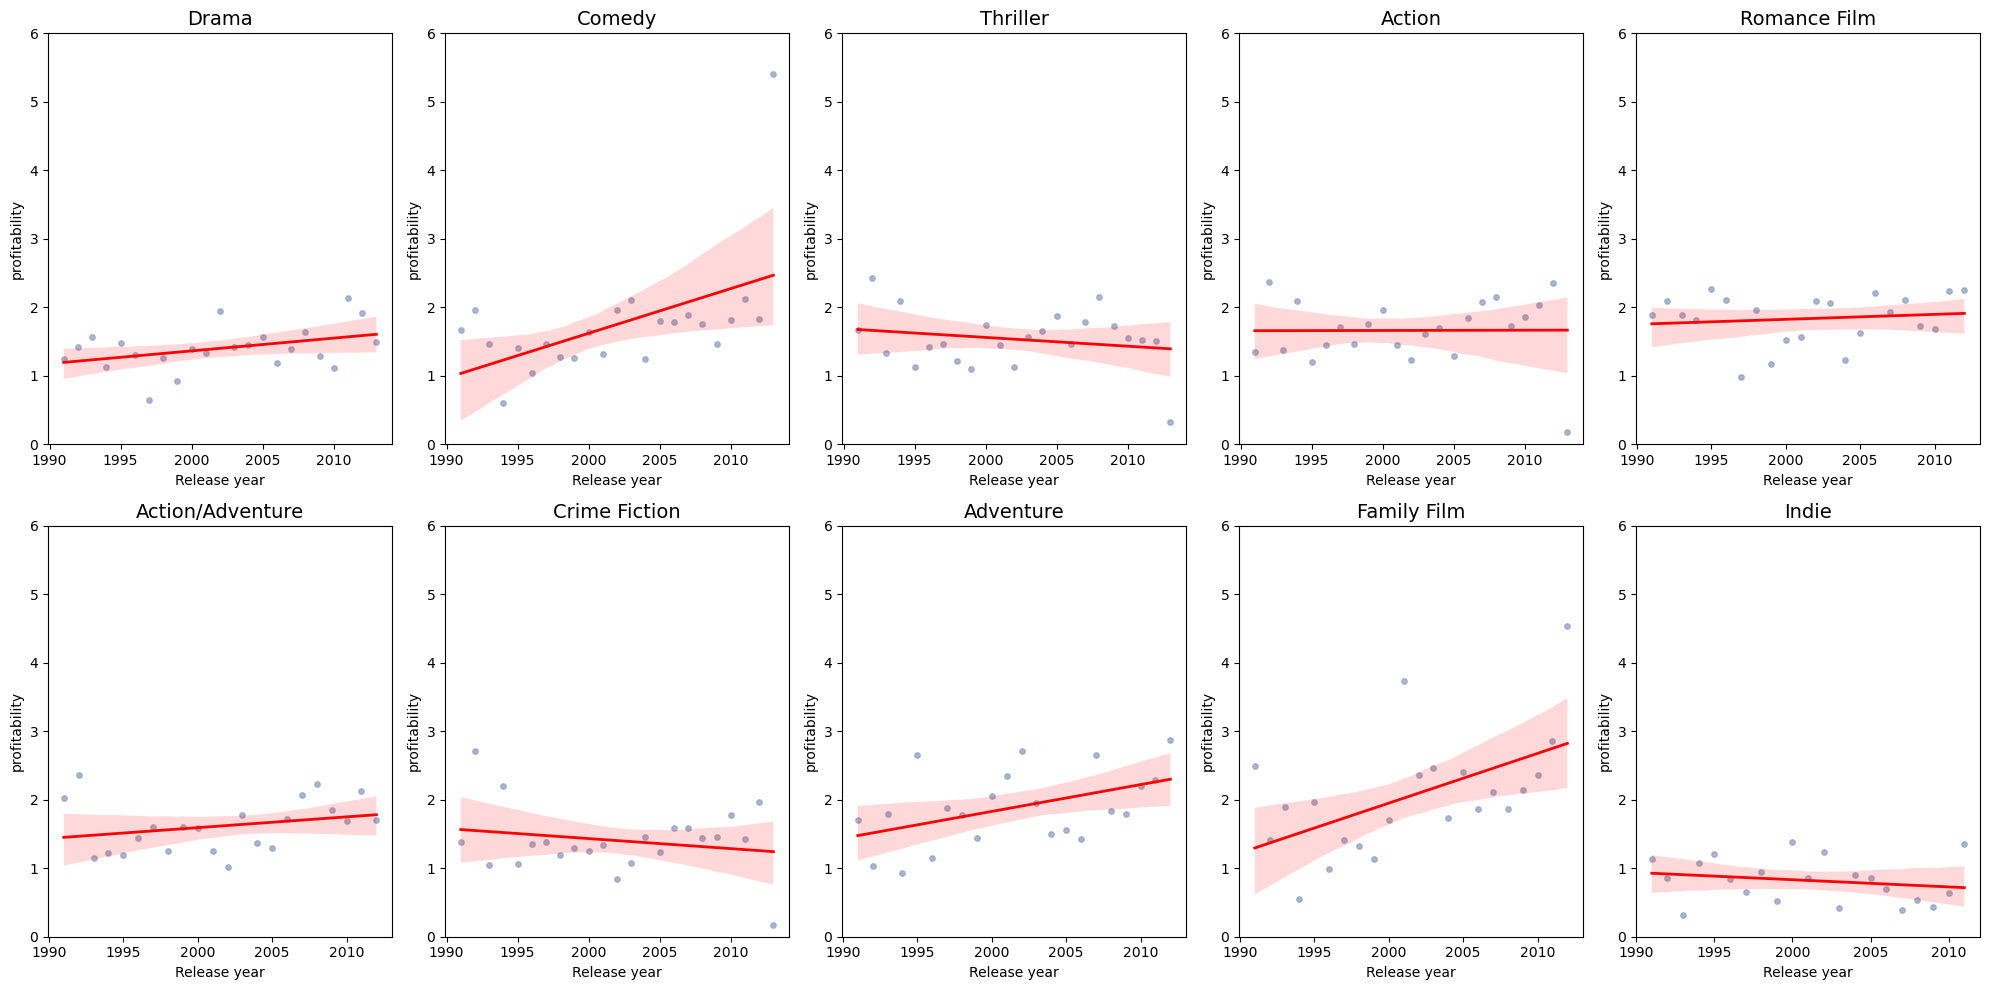

In [57]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('profitability')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Family films rise in popularity, which grows together with the number of family movies made. Then, comedy movies are better and finally, indie is shit


In [58]:
top_10_themes

Theme
Redemption    635
Betrayal      289
Love          270
Survival      242
Revenge       235
Friendship    164
Identity      148
Deception     125
Resilience     89
Adventure      84
Name: count, dtype: int64

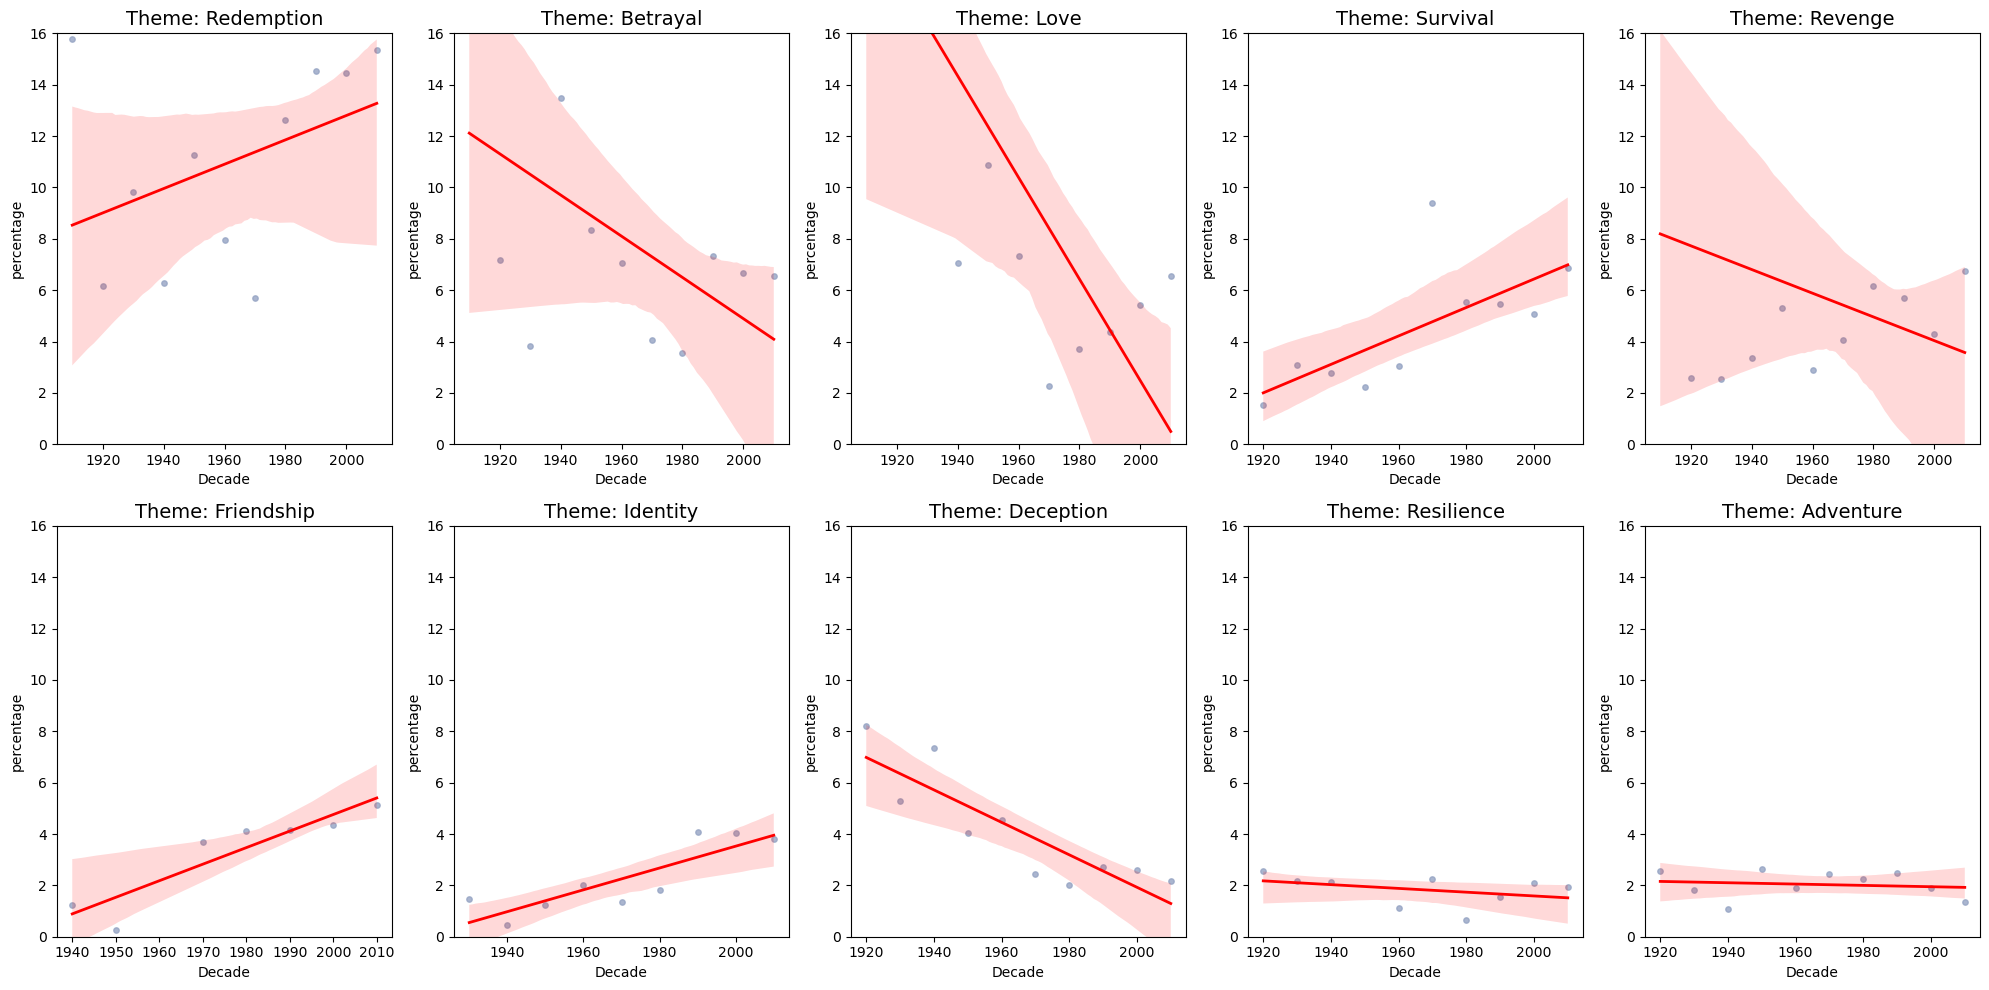

In [59]:
df_genres = df_exploded.groupby(['decade', 'Theme']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['decade', 'Theme', 'count']
df_genres['total'] = df_genres.groupby('decade')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Theme'] = df_genres['Theme'].astype(str)


df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='decade',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Decade')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

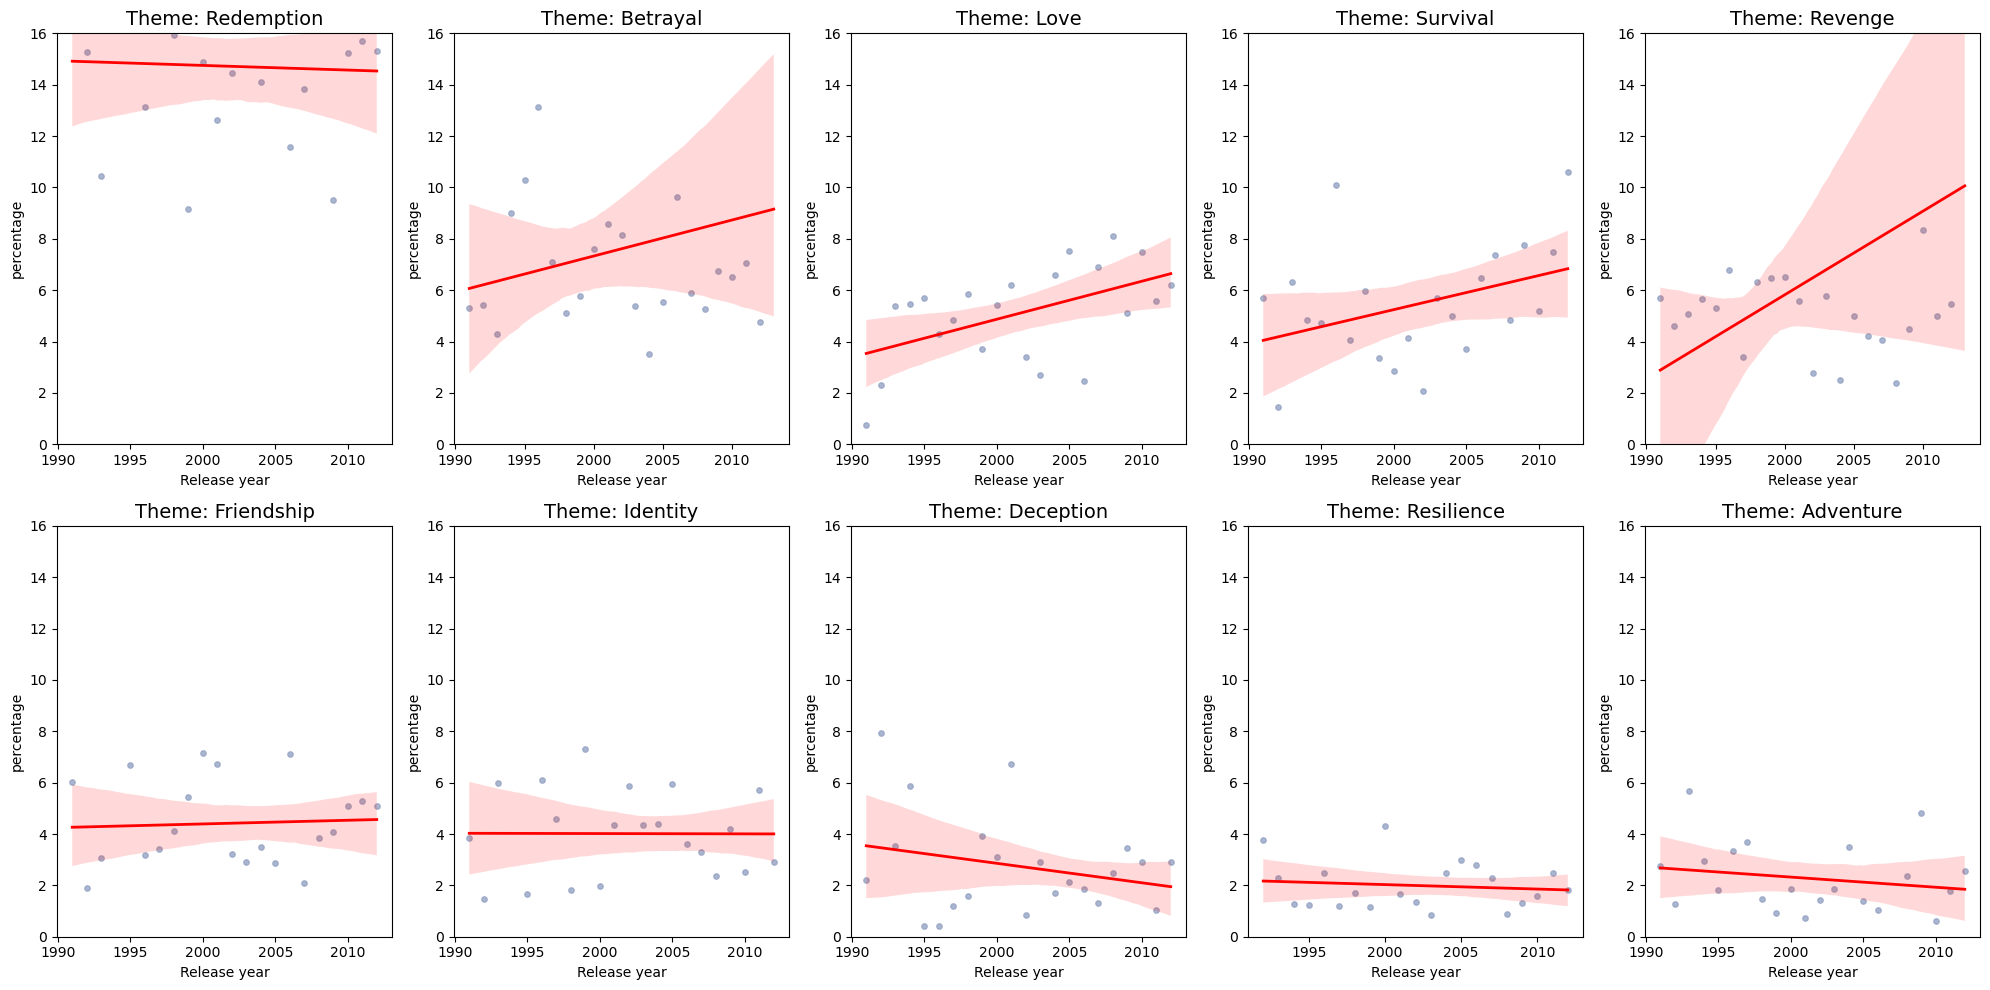

In [60]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme']).size()
df_genres = df_genres.reset_index()
df_genres.columns = ['Movie release year', 'Theme', 'count']
df_genres['total'] = df_genres.groupby('Movie release year')['count'].transform('sum')
df_genres['percentage'] = (df_genres['count'] / df_genres['total']) * 100
df_genres['Theme'] = df_genres['Theme'].astype(str)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)

axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='percentage',  
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"Theme: {theme}", fontsize=14)
    ax.set_ylim(0, 16)  
    ax.set_xlabel('Release year')
    ax.set_ylabel('percentage')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

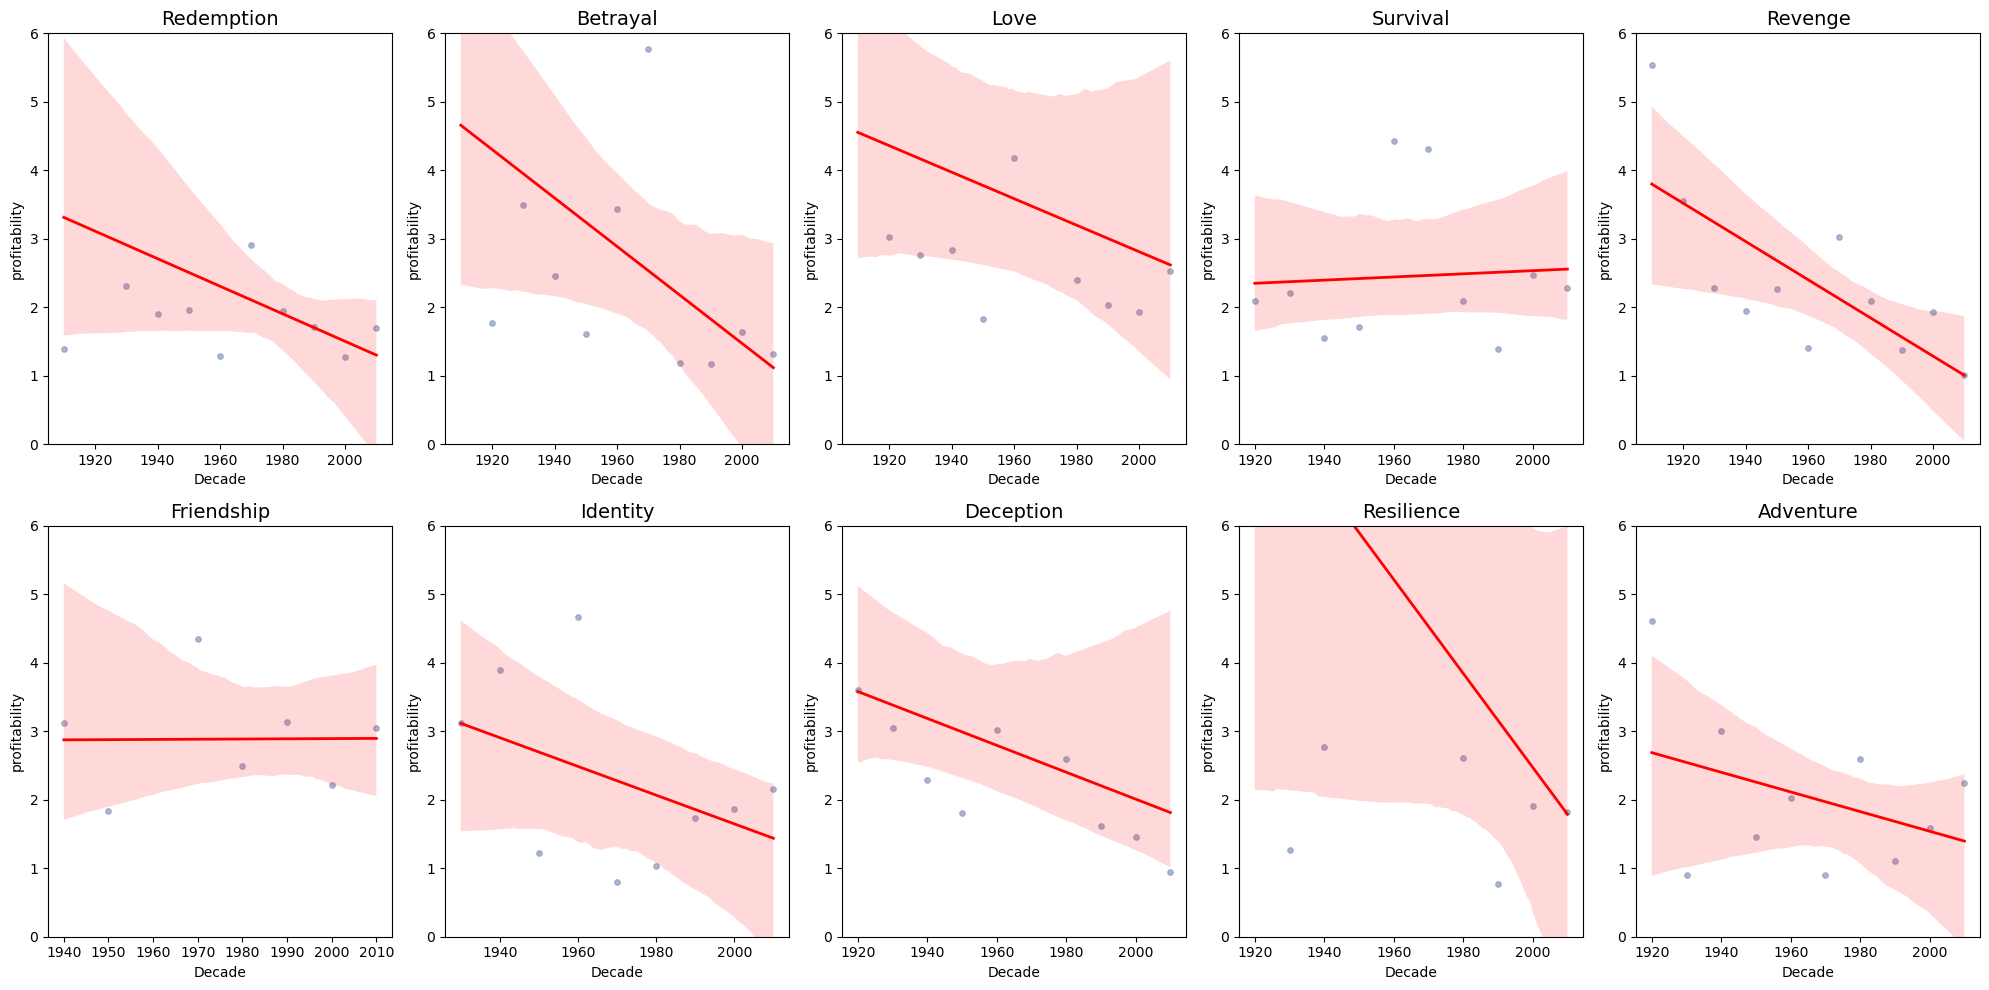

In [61]:
df_genres = df_exploded.groupby(['decade', 'Theme'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['decade'] > 1900]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]

    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='decade',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2} 
    )

    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Decade')
    ax.set_ylabel('profitability')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


#not the same in time

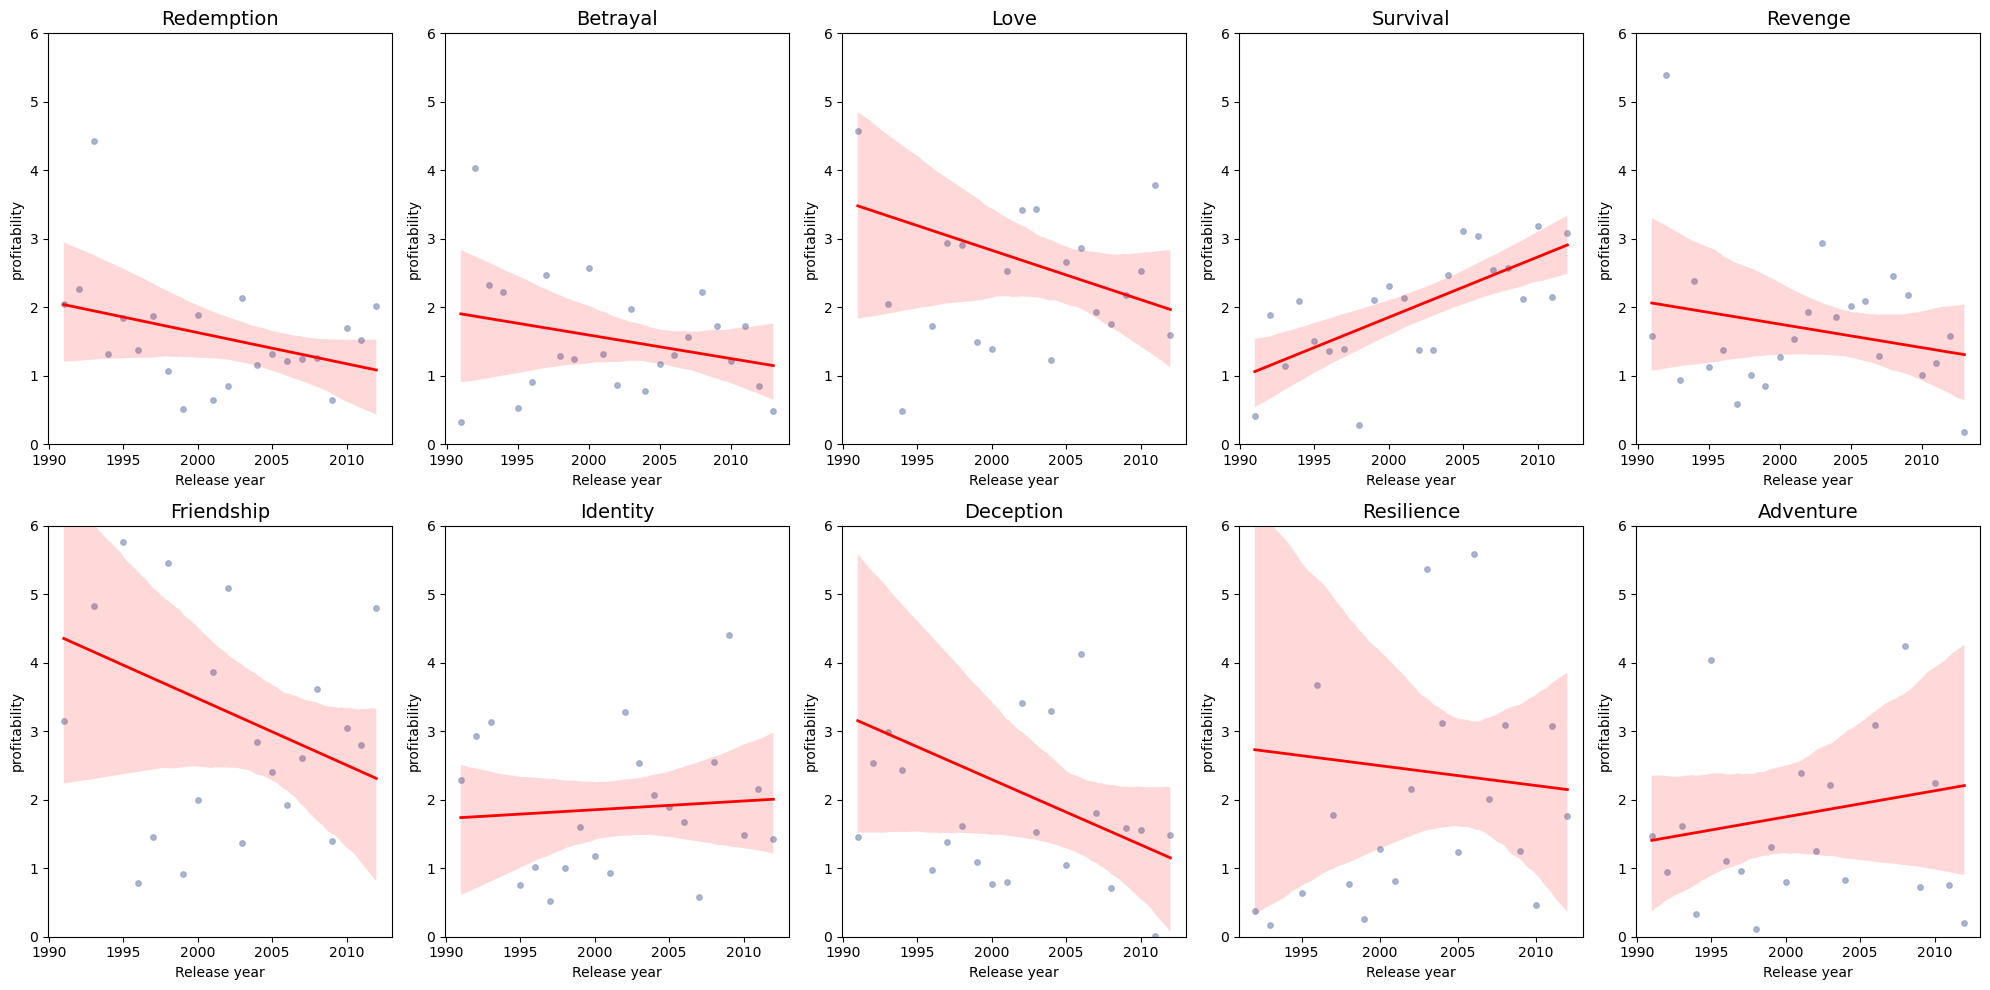

In [62]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['profitability'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='profitability', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('profitability')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [63]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres

Movie release year       Theme        budget
0                1915.0    Betrayal  5.254238e+05
1                1915.0        Love  4.586190e+05
2                1916.0  Redemption  3.008128e+07
3                1916.0     Revenge  5.587599e+05
4                1921.0        Love  3.794609e+06
..                  ...         ...           ...
540              2012.0  Resilience  1.895100e+07
541              2012.0     Revenge  6.091394e+07
542              2012.0    Survival  8.798680e+07
543              2013.0    Betrayal  4.640304e+07
544              2013.0     Revenge  7.291907e+07

[545 rows x 3 columns]

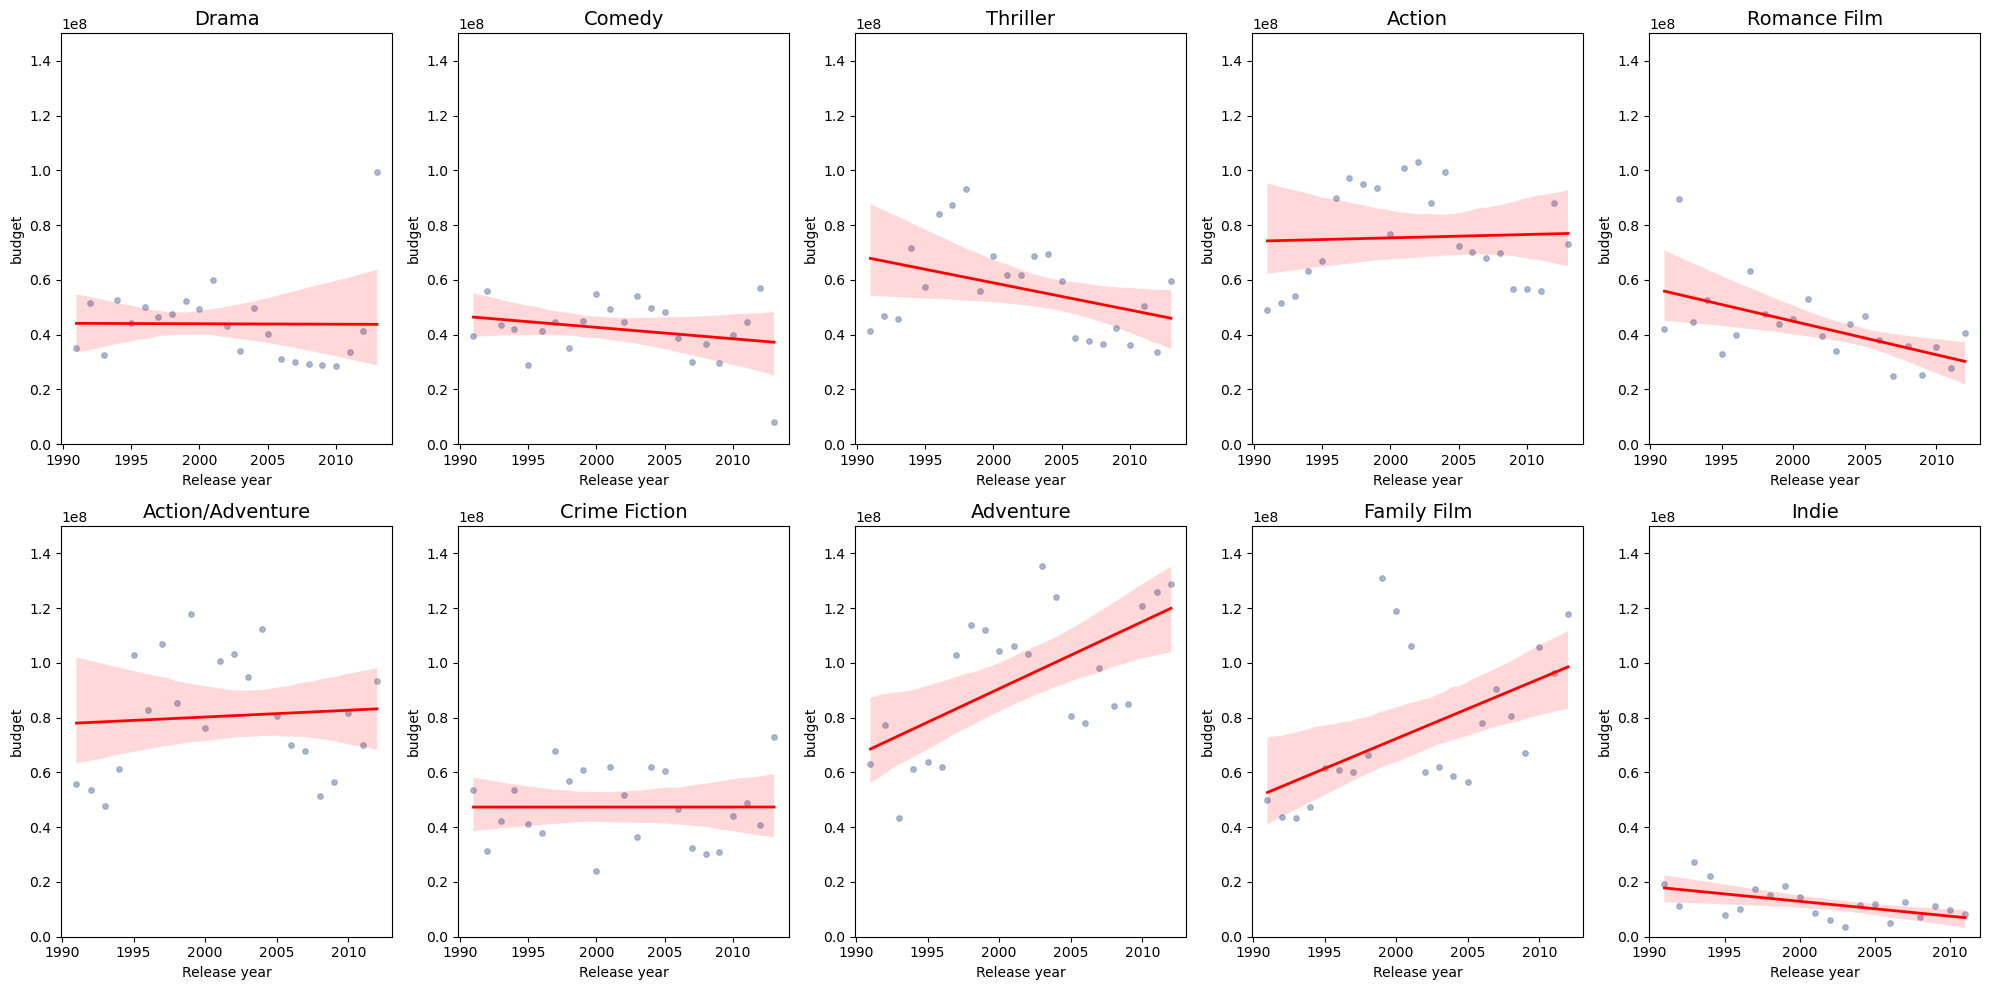

In [64]:
#do some genres have higher budget? 
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='budget', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 150000000)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('budget')
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

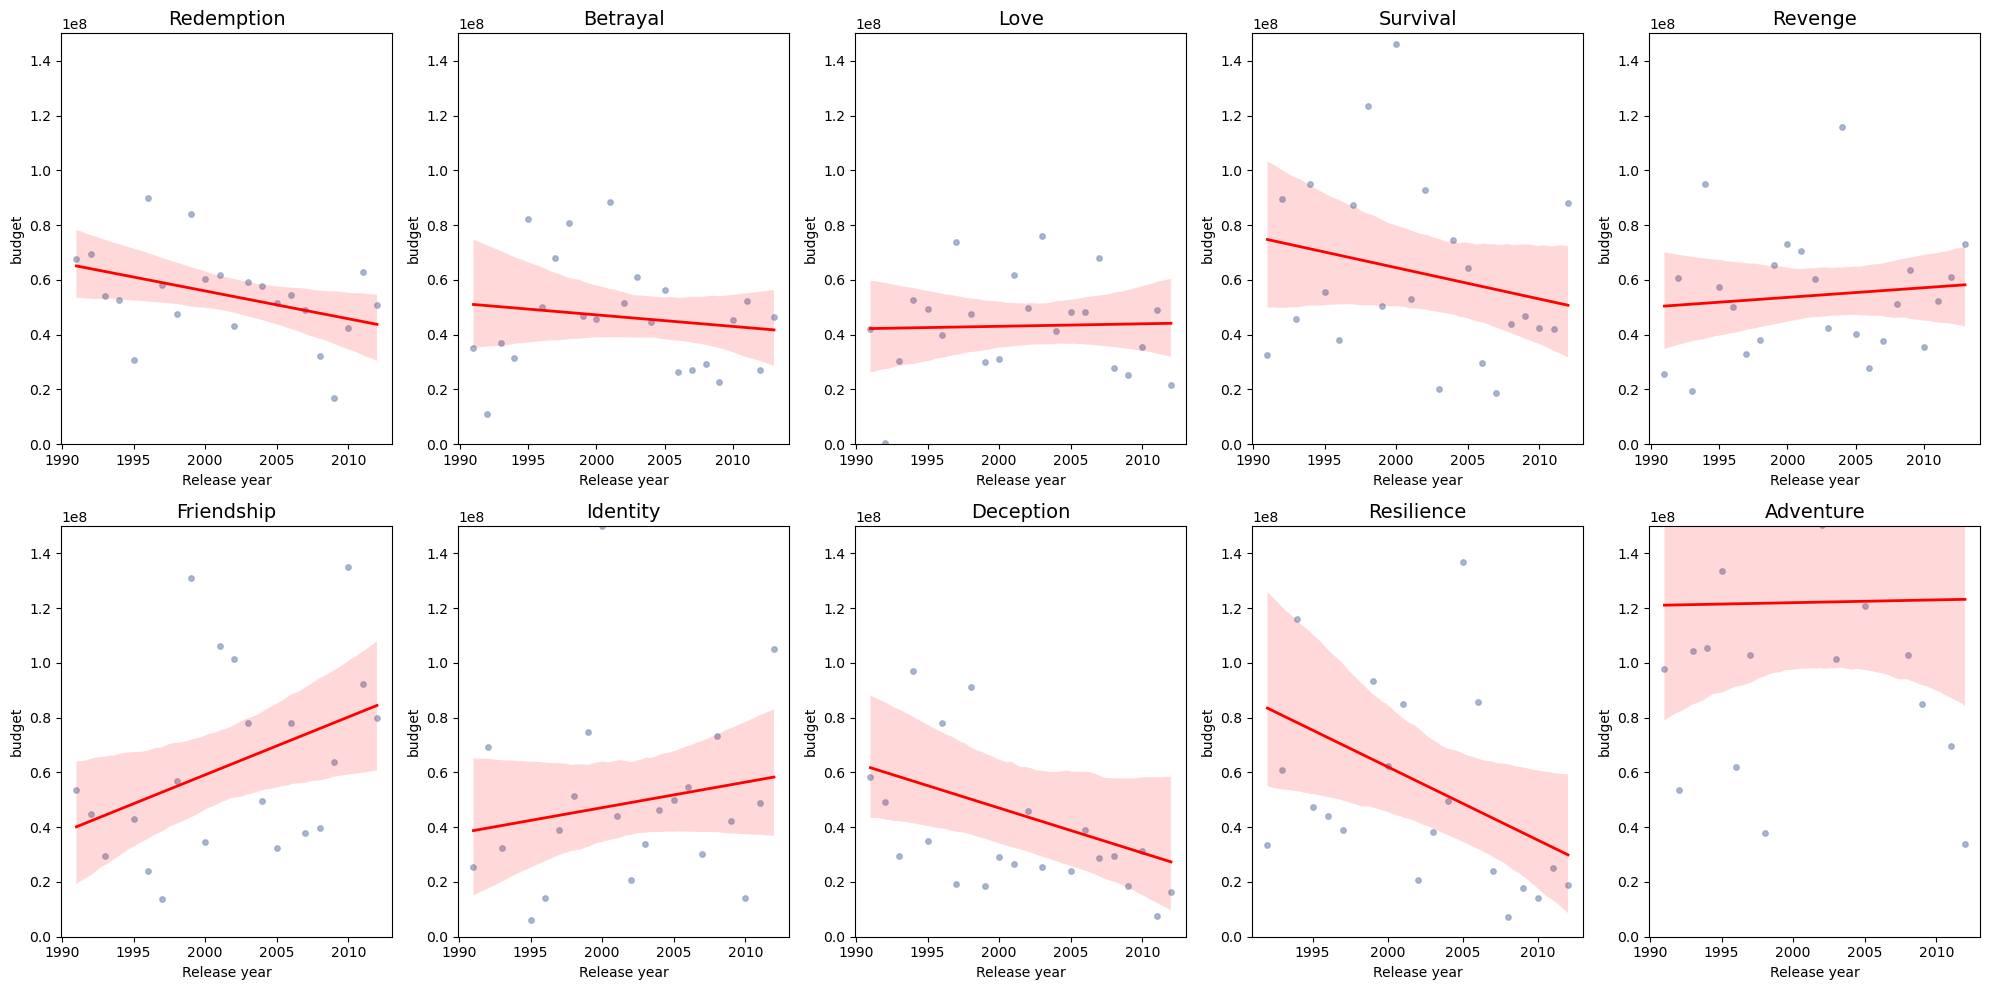

In [65]:
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['budget'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='budget', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 150000000)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('budget')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

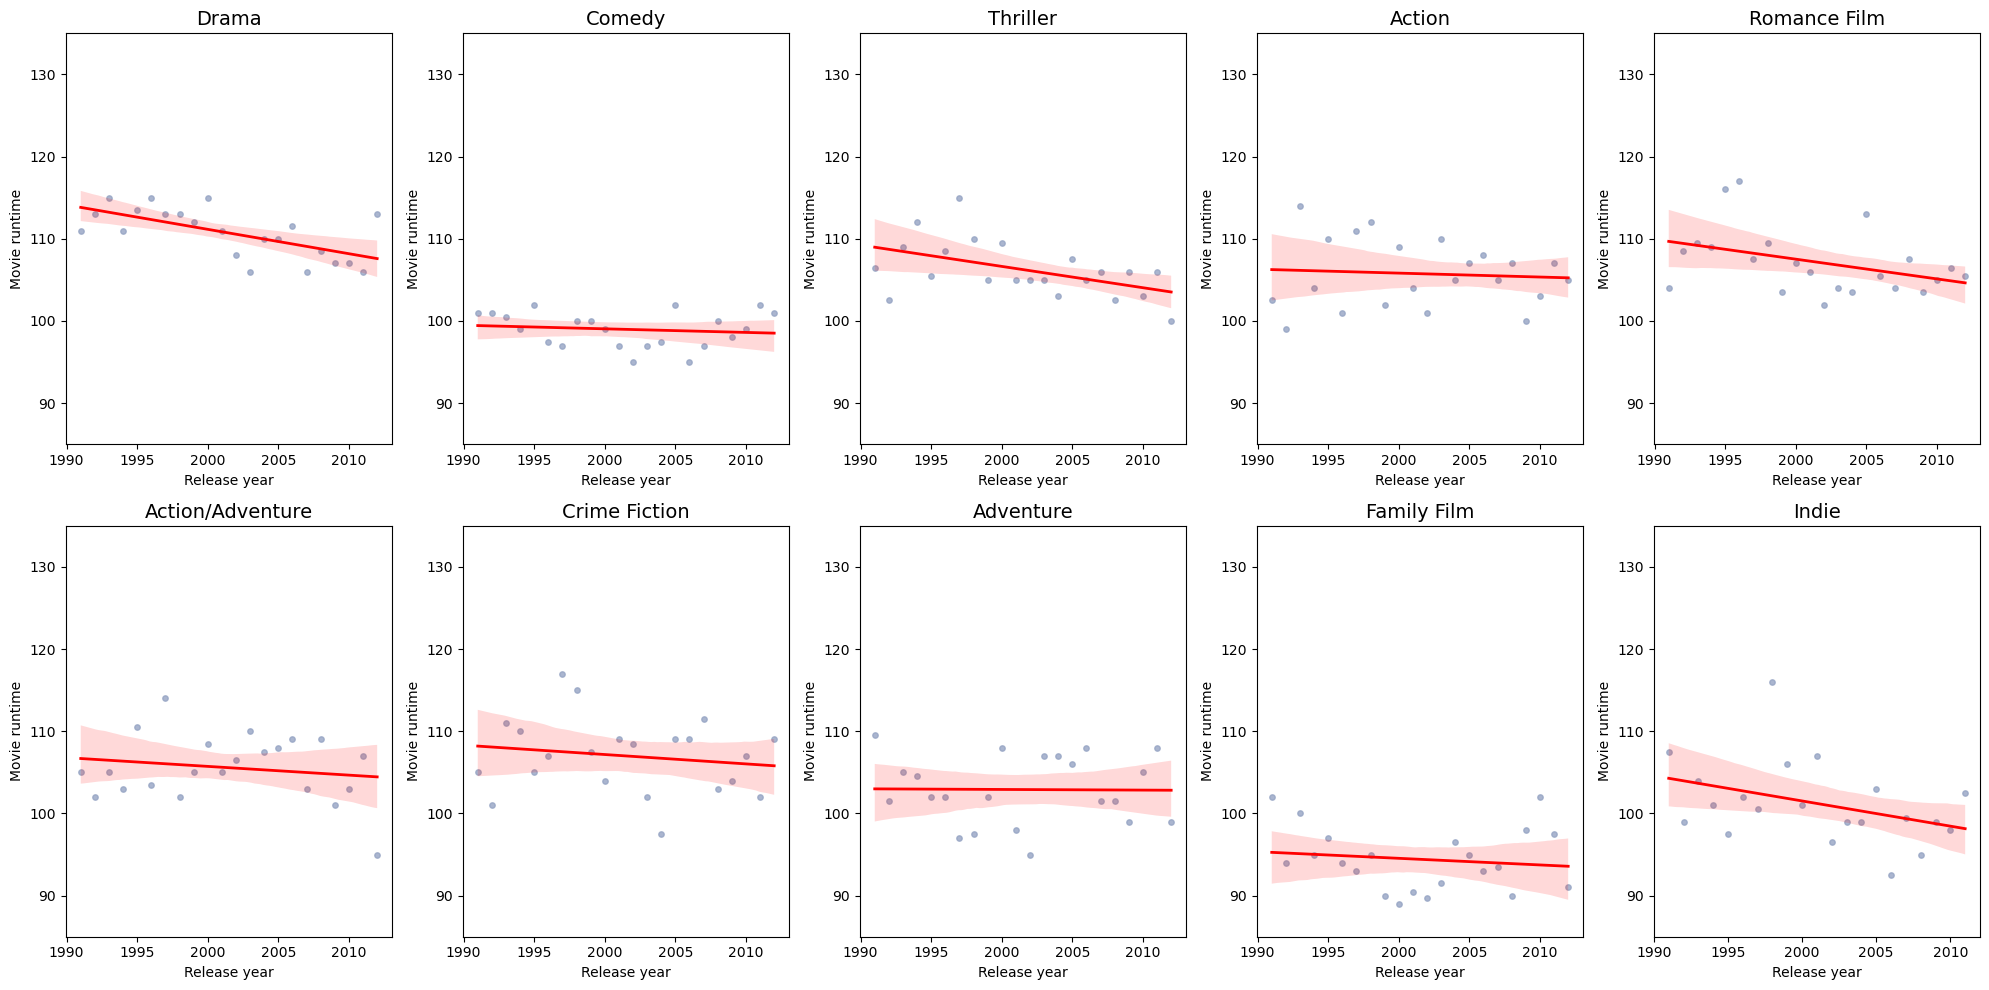

In [66]:
df_genres = df_exploded.groupby(['Movie release year', 'Movie genres'])['Movie runtime'].median().reset_index()
df_genres = df_genres[df_genres['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]
df_genres = df_genres[df_genres['Movie release year'] < 2013]

#df_genres = df_genres[df_genres['Movie runtime'] < 800]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_genres.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Movie genres'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='Movie runtime', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(85, 135)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('Movie runtime')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

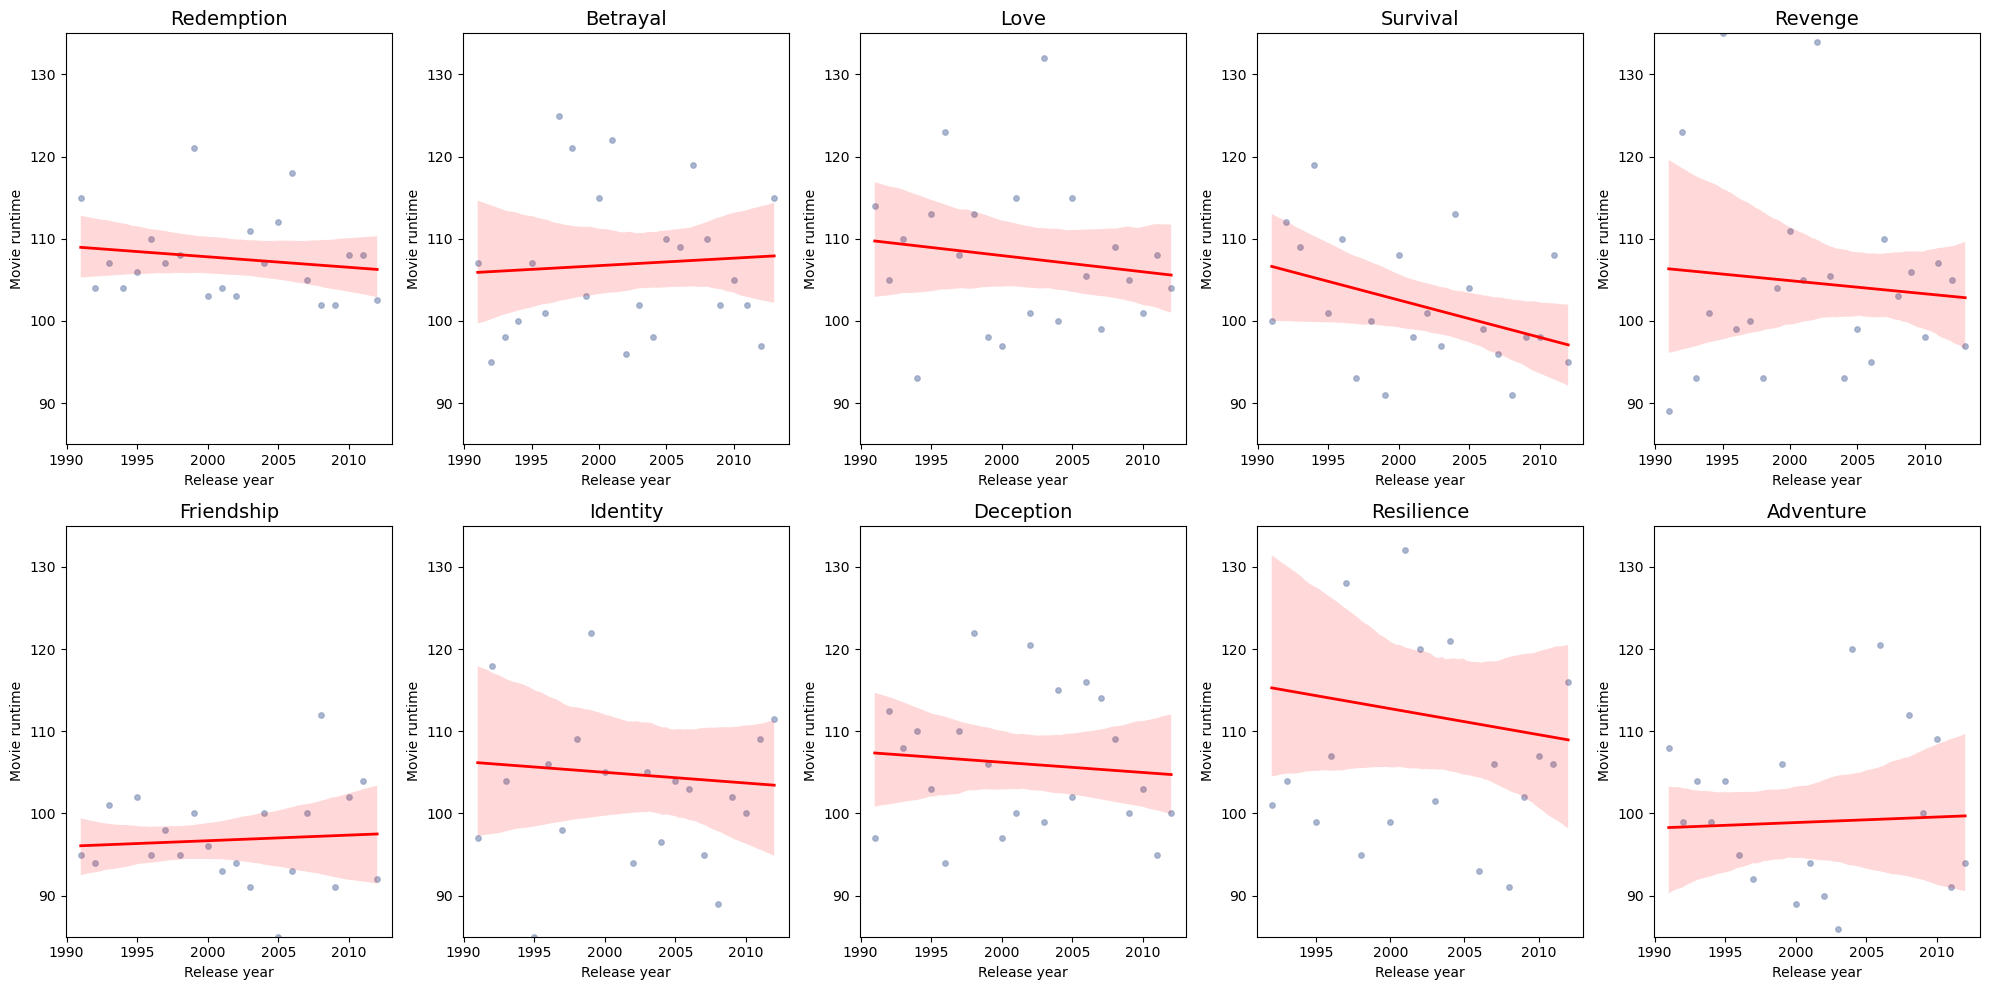

In [67]:
#do some genres have higher budget? 
df_genres = df_exploded.groupby(['Movie release year', 'Theme'])['Movie runtime'].median().reset_index()
df_genres = df_genres[df_genres['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_genres = df_genres[df_genres['Movie release year'] > 1990]

n_rows, n_cols = 2, 5  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, theme in enumerate(top_10_themes.index):  
    ax = axes[i]
    theme_data = df_genres[df_genres['Theme'] == theme]  

    sns.regplot(
        x='Movie release year',  
        y='Movie runtime', 
        data=theme_data,
        ax=ax,
        color='#95a3c3',
        scatter_kws={'s': 15},  
        line_kws={'color': 'red', 'linewidth': 2}  
    )

    # Set title and axis labels
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(85, 135)  

    ax.set_xlabel('Release year')
    ax.set_ylabel('Movie runtime')

# Remove any unused axes
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

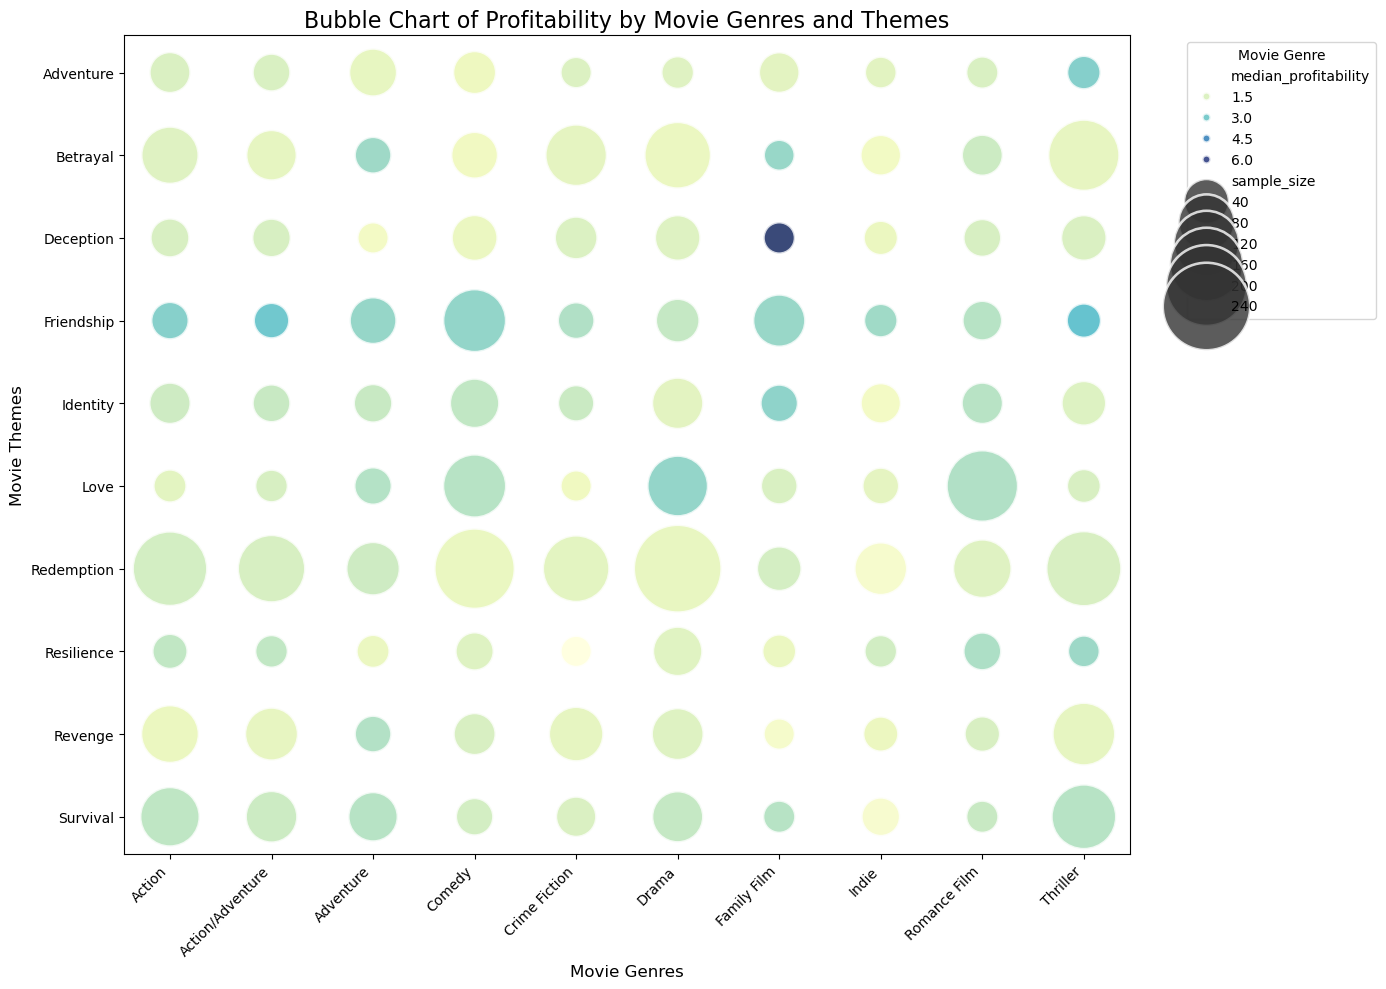

In [68]:
df_bubble = df_exploded.copy()  # Use your filtered dataset
df_bubble = df_bubble[df_bubble['budget'] > 0]  # Ensure budget is positive
df_bubble = df_bubble[df_bubble['profitability'] > 0]  # Ensure profitability is positive
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Filter by decade
df_bubble = df_bubble[df_bubble['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_bubble = df_bubble[df_bubble['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

df_aggregated = df_bubble.groupby(['Movie genres', 'Theme']).agg(
    median_profitability=('profitability', 'median'),
    sample_size=('profitability', 'size')  # Count number of samples
).reset_index()

# Create the bubble chart
plt.figure(figsize=(14, 10))
bubble_chart = sns.scatterplot(
    data=df_aggregated,
    x="Movie genres",  # X-axis: Movie genres
    y="Theme",  # Y-axis: Movie themes
    size="sample_size",  # Bubble size: Number of samples
    hue="median_profitability",  # Bubble color: Profitability
    sizes=(500, 4000),  # Adjust bubble size range
    palette="YlGnBu",  # Color palette for profitability
    alpha=0.8  # Transparency for better visualization
)

# Add labels and title
bubble_chart.set_title("Bubble Chart of Profitability by Movie Genres and Themes", fontsize=16)
bubble_chart.set_xlabel("Movie Genres", fontsize=12)
bubble_chart.set_ylabel("Movie Themes", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Movie Genre")

#color_legend = bubble_chart.legend(
#    handles=handles[0:5],  # Color handles
#    labels=labels[0:5],  # Color labels
#    bbox_to_anchor=(1.05, 1), loc="upper left",
#)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Combine the results Bubble Charts

Bubble Chart of Profitability: 
X-axis: Budget Y-axis: Release month Bubble Size: Profitability Bubble Color: Movie genre 


WHich is most important??? Decision Trees & Feature Importance (Machine Learning)
Train a decision tree or regression model with features like budget, release month, genre, theme, runtime, and year to predict profitability. Visualize the resulting feature importance chart showing which factors influence profitability the most.

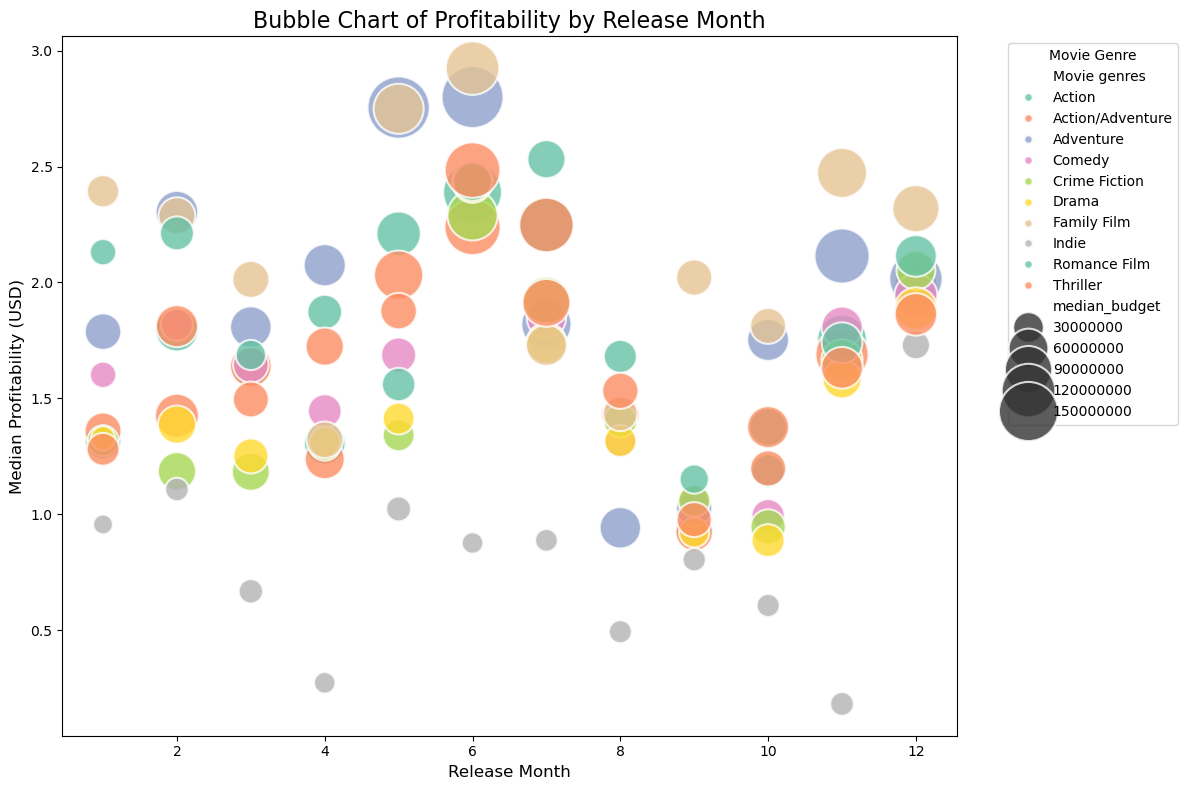

In [70]:
df_bubble = df_exploded.copy()  # Use your filtered dataset
df_bubble = df_bubble[df_bubble['budget'] > 0]  # Ensure budget is positive
df_bubble = df_bubble[df_bubble['profitability'] > 0]  # Ensure profitability is positive
df_bubble = df_bubble[df_bubble['decade'] > 1989]  # Filter by decade
df_bubble = df_bubble[df_bubble['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)


# Aggregate data by Movie genres and release month
df_aggregated = df_bubble.groupby(['Movie genres', 'Movie release month']).agg(
    median_profitability=('profitability', 'median'),
    median_budget=('budget', 'median')
).reset_index()

# Create bubble chart with release month on the y-axis
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(
    data=df_aggregated,
    y="median_profitability",  # X-axis: Median budget
    x="Movie release month",  # Y-axis: Release month
    size="median_budget",  # Bubble size: Median profitability
    sizes=(200, 2000),  # Adjust bubble size range
    hue="Movie genres",  # Bubble color: Movie genres
    palette="Set2",  # Color palette
    alpha=0.8  # Transparency for better overlap handling
)

# Add labels and title
bubble_chart.set_title("Bubble Chart of Profitability by Release Month", fontsize=16)
bubble_chart.set_xlabel("Release Month", fontsize=12)
bubble_chart.set_ylabel("Median Profitability (USD)", fontsize=12)

# Adjust legend and layout
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Movie Genre")
plt.tight_layout()
plt.show()

a. Choose Micro-Averaging When:
The focus is on overall model performance across all instances.
You want to minimize the global error (e.g., for predictions where every instance matters equally).
b. Choose Macro-Averaging When:
You're interested in ensuring fair performance across groups, especially in imbalanced datasets.
You want to highlight issues where the model performs poorly for certain groups (e.g., regions, demographics, or categories).

In [72]:
df_ml = df_exploded.copy()
df_ml = df_ml[df_ml['Movie genres'].isin(top_10_genres.index)].reset_index(drop=True)
df_ml = df_ml[df_ml['Theme'].isin(top_10_themes.index)].reset_index(drop=True)
df_ml = df_ml[df_ml['Movie release year'] > 1988]
df_ml = df_ml[['Movie release month', 'Movie runtime', 'Movie genres', 'Theme', 'budget', 'profitability']]
# List of categorical features to one-hot encode
categorical_features = ['Movie release month', 'Movie genres', 'Theme']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_ml, columns=categorical_features, drop_first=True)

y = df_encoded['profitability'] 
X = df_encoded.drop(columns = ['profitability'])

In [73]:
y_train.sort_values()

NameError: name 'y_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42,max_depth = 12)
regressor.fit(X_train, y_train)


In [ ]:
tree = regressor.tree_

# Locate the leaf node with the maximum profitability
leaf_values = tree.value[tree.children_left == -1]  # Only leaf nodes
max_profitability_index = np.argmax(leaf_values)  # Index of the leaf with max profitability
max_profitability_value = leaf_values[max_profitability_index]

# Trace back the decision path
def get_decision_path(tree, node_index, feature_names):
    path = []
    while node_index != 0:  # Root node has index 0
        parent_index = np.where(
            (tree.children_left == node_index) | (tree.children_right == node_index)
        )[0][0]
        if node_index == tree.children_left[parent_index]:
            threshold = f"<= {tree.threshold[parent_index]:.2f}"
        else:
            threshold = f"> {tree.threshold[parent_index]:.2f}"
        path.append(
            f"{feature_names[tree.feature[parent_index]]} {threshold}"
        )
        node_index = parent_index
    return path[::-1]  # Reverse to start from the root

# Extract feature names
feature_names = X_train.columns

# Get the decision path for the leaf node with max profitability
decision_path = get_decision_path(tree, max_profitability_index, feature_names)

# Print the results
print("Decision Path to Maximum Profitability:")
for step in decision_path:
    print(step)
print(f"Maximum Profitability: {max_profitability_value[0][0]:.2f}")

In [ ]:
import statsmodels.api as sm

# Check the DataFrame to confirm all columns are numeric
X = X.map(lambda x: int(x) if isinstance(x, bool) else x)

X = sm.add_constant(X)

# Step 3: Fit the OLS model
ols_model = sm.OLS(np.log(y), X).fit(cov_type='HC0')

# Step 4: Summarize the model
print(ols_model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display results
print(vif_data)

In [ ]:

df_genres_old = df_exploded[df_exploded['decade'] > 1929]

# Calculate median profitability for the old dataset
df_gen_old_profit = df_genres_old.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_gen_old_profit = df_gen_old_profit[df_gen_old_profit['Movie genres'].isin(genres_list)].reset_index(drop=True)

# Organize data for old dataset
pivot_table_old_profit = df_gen_old_profit.pivot(index='decade', columns='Movie genres', values='profitability').fillna(0)

df_genres_new = df_exploded[df_exploded['decade'] > 1989]
# Calculate median profitability for the new dataset
df_gen_new_profit = df_genres_new.groupby(['Movie release year', 'Movie genres'])['profitability'].median().reset_index()
df_gen_new_profit = df_gen_new_profit[df_gen_new_profit['Movie genres'].isin(genres_list)].reset_index(drop=True)

# Organize data for new dataset
pivot_table_new_profit = df_gen_new_profit.pivot(index='Movie release year', columns='Movie genres', values='profitability').fillna(0)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Plot 1: Median profitability by decade
pivot_table_old_profit.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_title("Median Profitability by Decade")
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("Median Profitability")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
axes[0].set_ylim(0, pivot_table_old_profit.max().max() + 1)

# Plot 2: Median profitability for the last 20 years
pivot_table_new_profit.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_title("Median Profitability for the Last 20 Years")
axes[1].set_xlabel("Year")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend_.remove()
axes[1].set_ylim(0, pivot_table_new_profit.max().max() + 1)

plt.tight_layout()
plt.savefig('visuals/17.png', bbox_inches='tight')
plt.show()

In [ ]:
#We use the extended genres dataset
#Add the representation % to a dataframe after grouping and counting the occurences of each genre per decade. We start from 1929 as sample size is too small before that
df_genres__ = df_exploded[df_exploded['decade'] > 1929]
df_gen = df_genres__.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_gen.columns = ['decade', 'Movie genres', 'median profitability']
df_gen['Movie genres'] = df_gen['Movie genres'].astype(str)

#Keep only genres we are interested in
df_gen = df_gen[df_gen['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Organize data
pivot_table = df_gen.pivot(index='decade', columns='Movie genres', values='median profitability').fillna(0)


#Plotting
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Median Profitability by Decade")
plt.xlabel("Decade")
plt.ylabel("Median Profitability")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('visuals/16.png', bbox_inches='tight')
plt.show()


In [ ]:
df_rel = df_release[df_release['Movie release year'] < 2012]
df_rel = df_rel[df_rel['Movie release year'] > 1929]

# Calculate the proportion of movies released per month for each year
df_release_counts = df_rel.groupby(['Movie release year', 'Movie release month']).size().reset_index(name='count')

# Normalize counts to proportions within each year
df_release_counts['proportion'] = df_release_counts.groupby('Movie release year')['count'].transform(lambda x: x / x.sum()) * 100

# Sort by most recent year first
df_release_counts = df_release_counts.sort_values(by='Movie release year', ascending=False)

fig = px.bar(
    df_release_counts, 
    x="Movie release month", 
    y="proportion", 
    color="Movie release month", 
    animation_frame="Movie release year",
    labels={
        "Movie release month": "Month", 
        "proportion": "Proportion of Movies Released (%)"
    },
    title="Proportion of Movies Released Per Month (Animated by Year)",
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Update layout to remove the legend and adjust visualization
fig.update_layout(
    showlegend=False,
    coloraxis_showscale=False,
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(1, 13),
        ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ),
    yaxis_title="Proportion of Movies Released (%)",
    xaxis_title="Month"
)